<a href="https://colab.research.google.com/github/Akramkhan01/Appliances-Energy-Prediction-Capstone-Project/blob/main/Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data-driven prediction of energy use of appliances**
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).

date time year-month-day hour:minute:second
Appliances, energy use in Wh (Dependent variable)
lights, energy use of light fixtures in the house in Wh (Drop this column)

T1, Temperature in kitchen area, in Celsius

RH1, Humidity in kitchen area, in % T2, Temperature in living room area, in Celsius RH2,
Humidity in living room area, in %

T3, Temperature in laundry room area

RH3, Humidity in laundry room area, in % T4, Temperature in office room, in Celsius RH4,
Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH5, Humidity in bathroom, in % T6, Temperature outside the building (north side), in Celsius

RH6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH7, Humidity in ironing room, in % T8, Temperature in teenager room 2, in Celsius RH8,
Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH9, Humidity in parents room, in % To, Temperature outside (from Chievres weather station), in
Celsius Pressure (from Chievres weather station), in mm Hg RHout, Humidity outside (from
Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station
(Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis,
rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of
weather data.

In [ ]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the dataset

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/Appliances Energy Prediction/'
df = pd.read_csv(file_path+'data_application_energy.csv')

In [ ]:
# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.head()

date  Appliances  lights  ...  Tdewpoint        rv1        rv2
0  2016-01-11 17:00:00          60      30  ...        5.3  13.275433  13.275433
1  2016-01-11 17:10:00          60      30  ...        5.2  18.606195  18.606195
2  2016-01-11 17:20:00          50      30  ...        5.1  28.642668  28.642668
3  2016-01-11 17:30:00          50      40  ...        5.0  45.410389  45.410389
4  2016-01-11 17:40:00          60      40  ...        4.9  10.084097  10.084097

[5 rows x 29 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
# Check for null values

df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

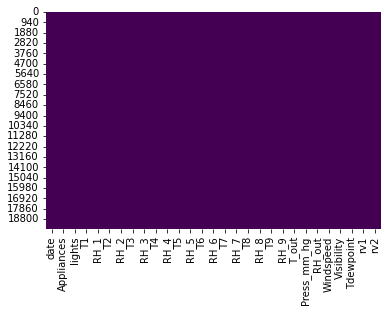

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [ ]:
## Lets go and see the percentage of missing values
df.isnull().mean()

date           0.0
Appliances     0.0
lights         0.0
T1             0.0
RH_1           0.0
T2             0.0
RH_2           0.0
T3             0.0
RH_3           0.0
T4             0.0
RH_4           0.0
T5             0.0
RH_5           0.0
T6             0.0
RH_6           0.0
T7             0.0
RH_7           0.0
T8             0.0
RH_8           0.0
T9             0.0
RH_9           0.0
T_out          0.0
Press_mm_hg    0.0
RH_out         0.0
Windspeed      0.0
Visibility     0.0
Tdewpoint      0.0
rv1            0.0
rv2            0.0
dtype: float64

In [ ]:
# Check for duplicates

duplicate_df = df[df.duplicated()]
duplicate_df

Empty DataFrame
Columns: [date, Appliances, lights, T1, RH_1, T2, RH_2, T3, RH_3, T4, RH_4, T5, RH_5, T6, RH_6, T7, RH_7, T8, RH_8, T9, RH_9, T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint, rv1, rv2]
Index: []

# We have no null values and duplicate records.

In [ ]:
df['lights'].value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

# Light has maximum values as 0 it is better to drop it.

In [ ]:
# Dropping Light Column
#df =df.drop('lights', axis=1)
#df.shape


In [ ]:
df.describe()

Appliances        lights  ...           rv1           rv2
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean      97.694958      3.801875  ...     24.988033     24.988033
std      102.524891      7.935988  ...     14.496634     14.496634
min       10.000000      0.000000  ...      0.005322      0.005322
25%       50.000000      0.000000  ...     12.497889     12.497889
50%       60.000000      0.000000  ...     24.897653     24.897653
75%      100.000000      0.000000  ...     37.583769     37.583769
max     1080.000000     70.000000  ...     49.996530     49.996530

[8 rows x 28 columns]

# **Exploratory Data Analysis**

# Dependent Variable - Appliances

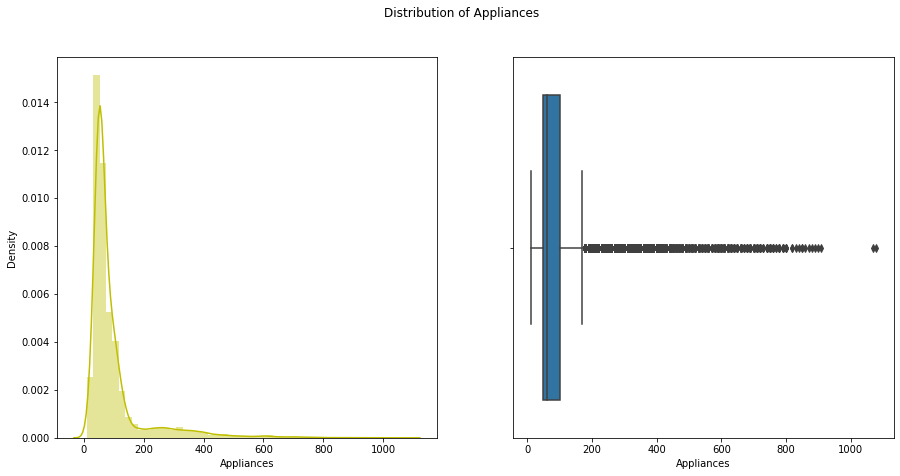

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,7))

f.suptitle('Distribution of Appliances')
sns.distplot(df['Appliances'], hist=True, ax=axes[0],color="y")
sns.boxplot(data=df, x='Appliances', ax=axes[1])

plt.show()

# Distribution is highly right skewed. Also, we can see there are outliers.

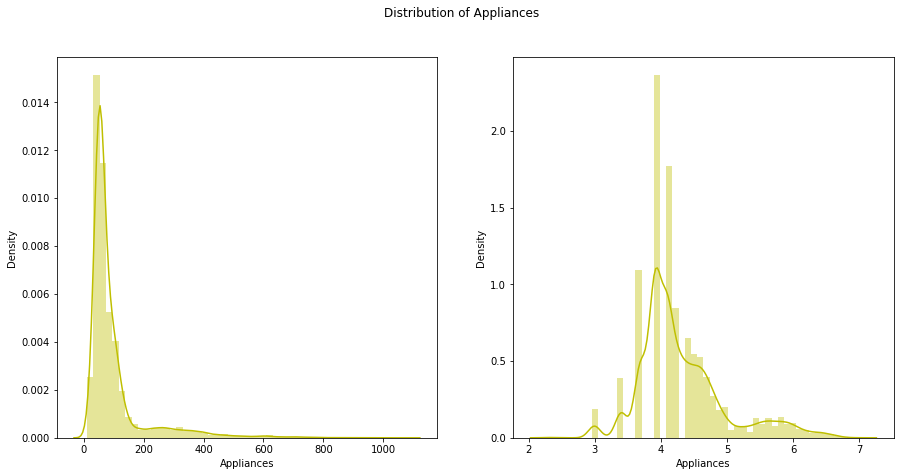

In [ ]:
# Using log transformation to treat the skewness

f, axes = plt.subplots(1, 2, figsize=(15,7))

f.suptitle('Distribution of Appliances')
sns.distplot(df['Appliances'], hist=True, ax=axes[0],color='y')
sns.distplot(np.log(df['Appliances']), hist=True, ax=axes[1],color='y')

plt.show()

# **Lights**

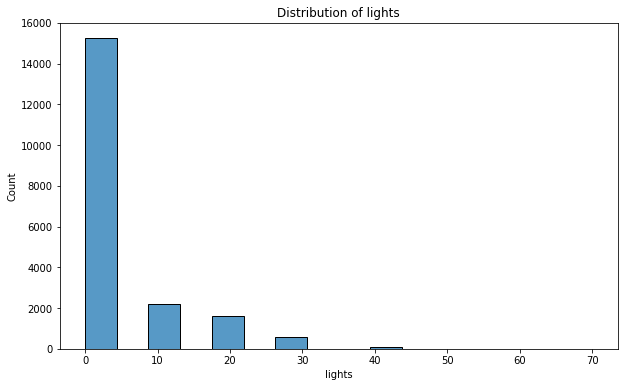

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(data=df, x='lights')
plt.title(f'Distribution of lights')
plt.show()

In [ ]:
df.lights.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

## Light column has 15252 entires with value = 0. It could mean there is no human presence in that room at that time; or it could be during the day where  lights are not turned on; or it could be during the night when lights are  turned off. 

# Numeric Feature Univariate Analysis using Histogram

In [ ]:
# Dropping Light Column
df =df.drop('lights', axis=1)
df.shape

(19735, 28)

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
len(numeric_features)

27

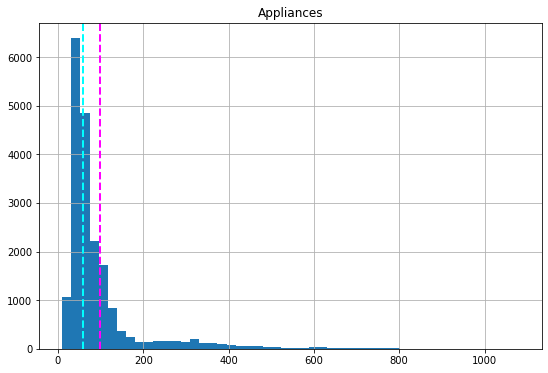

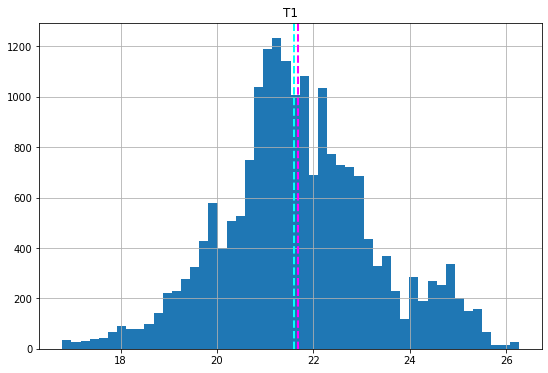

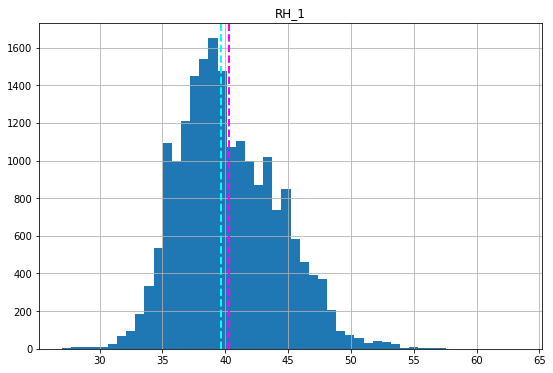

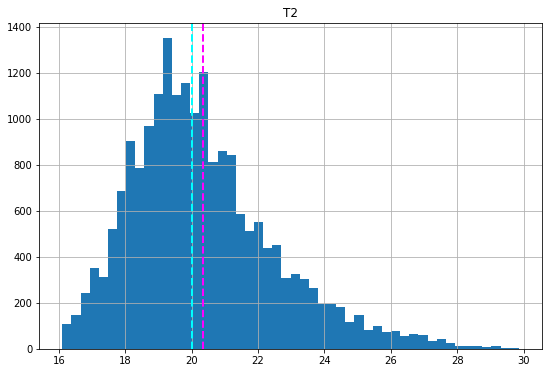

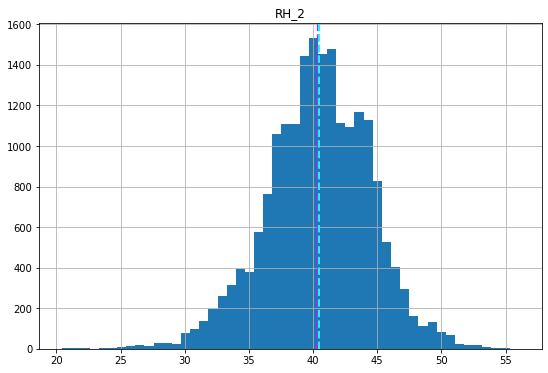

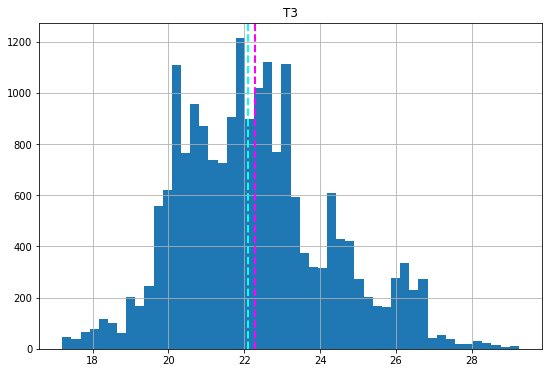

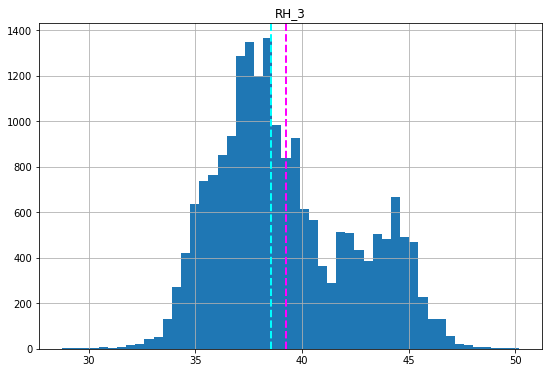

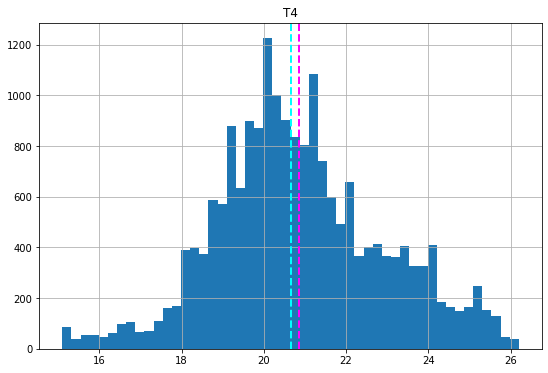

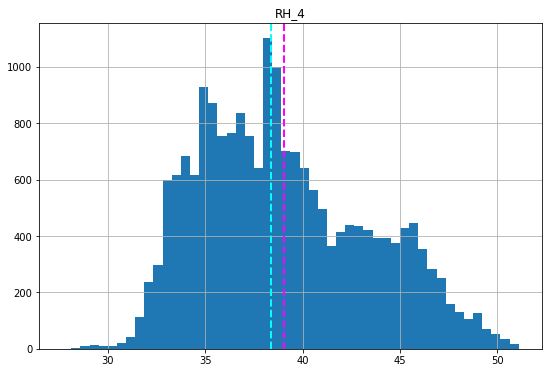

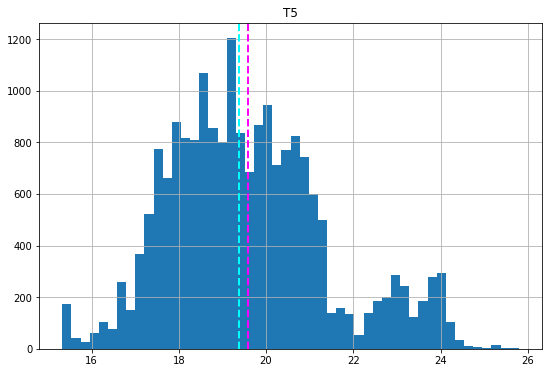

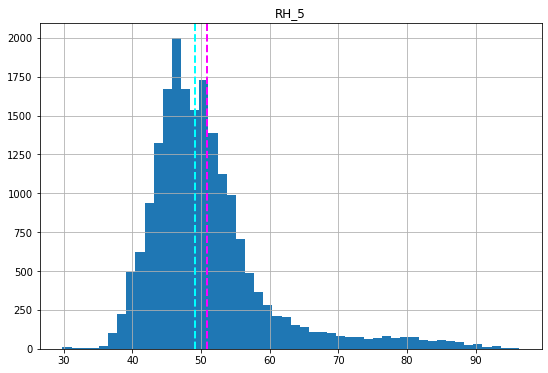

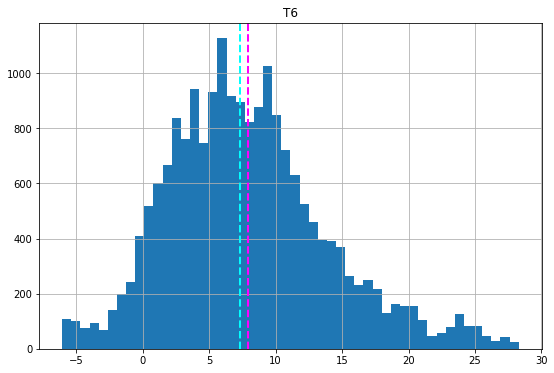

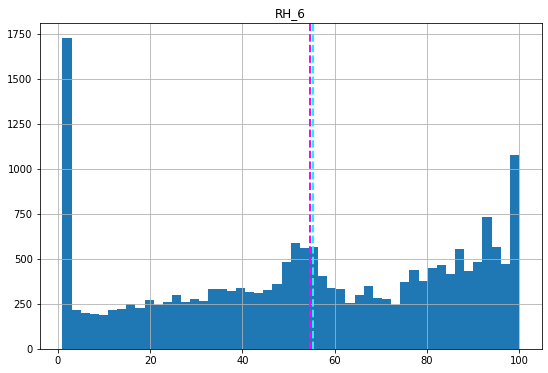

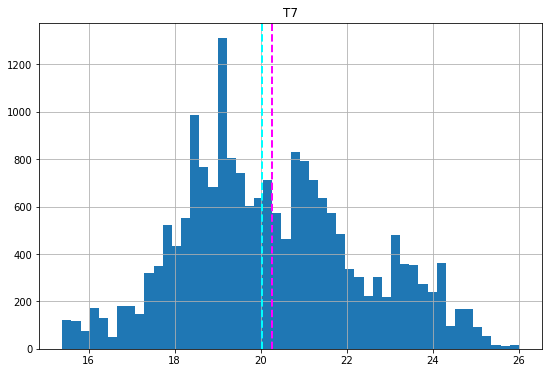

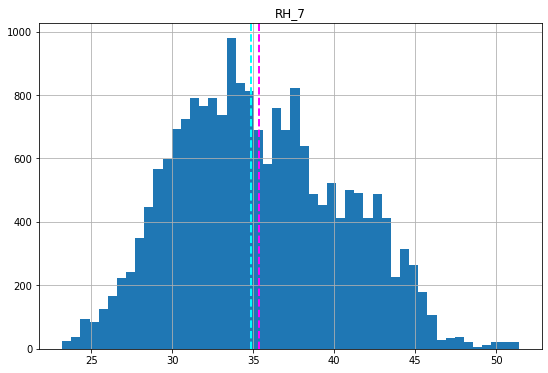

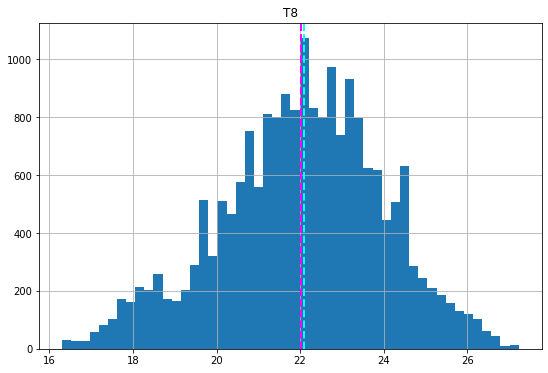

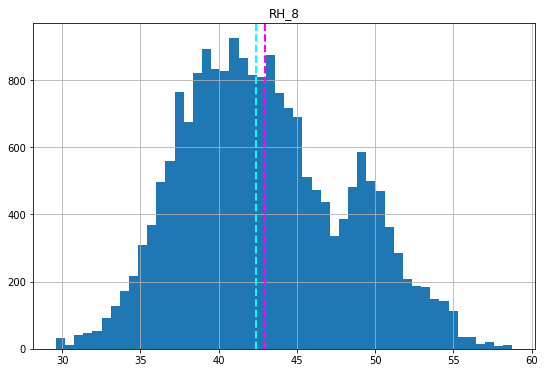

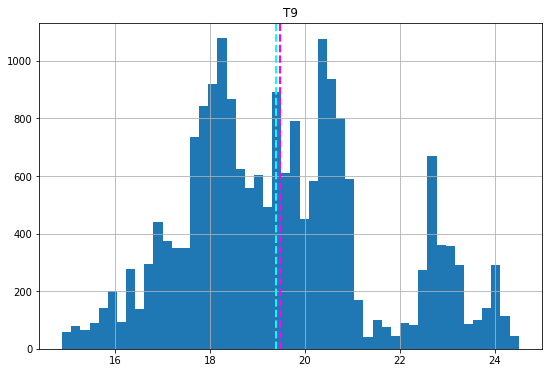

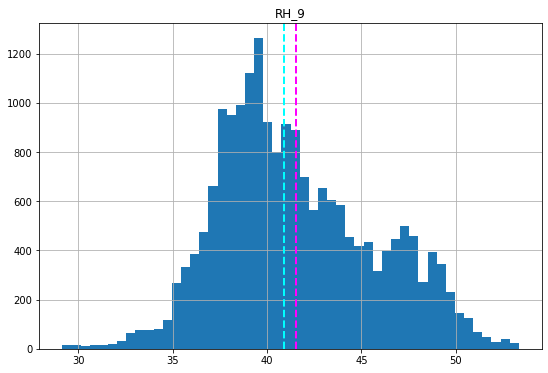

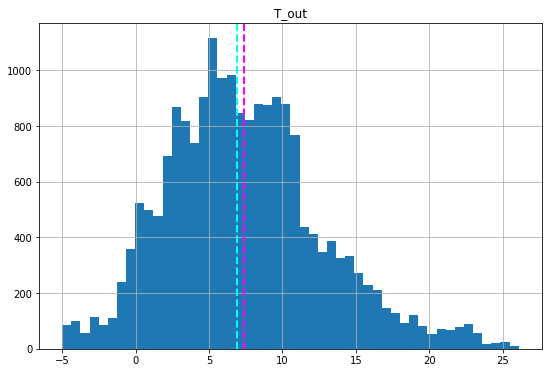

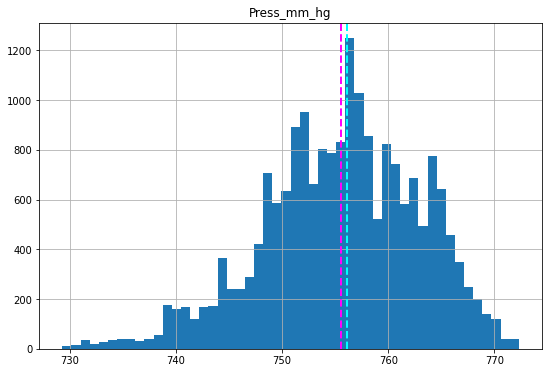

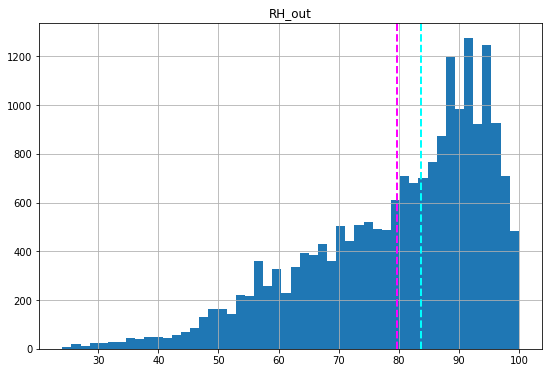

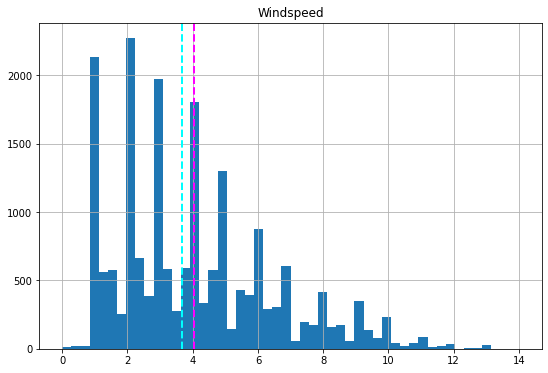

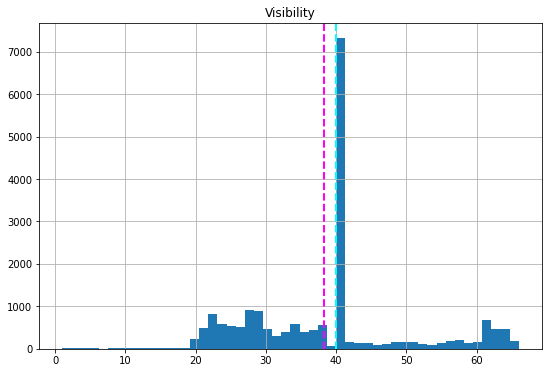

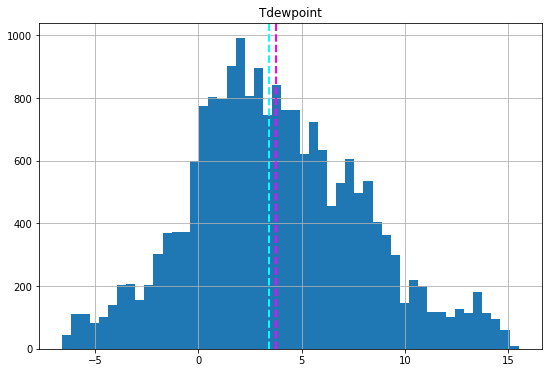

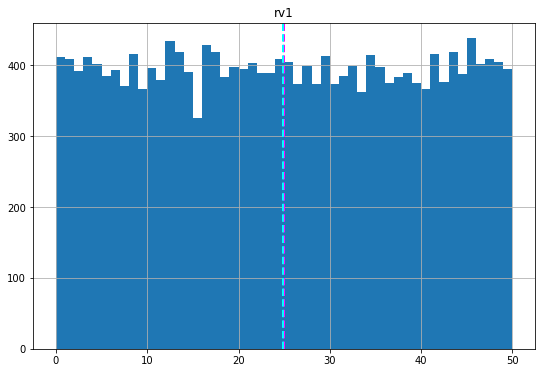

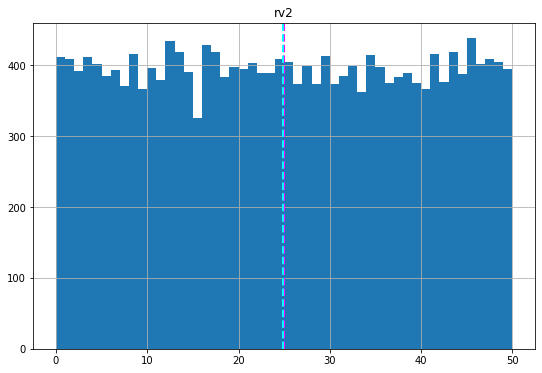

In [ ]:
# plot a bar plot for each numerical feature count (except date)

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

# Numeric Feature Univariate Analysis using Scatter Plot

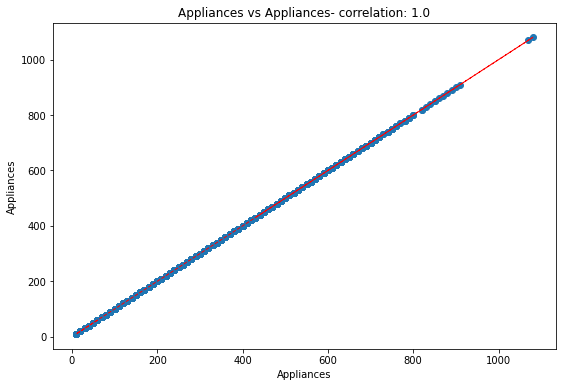

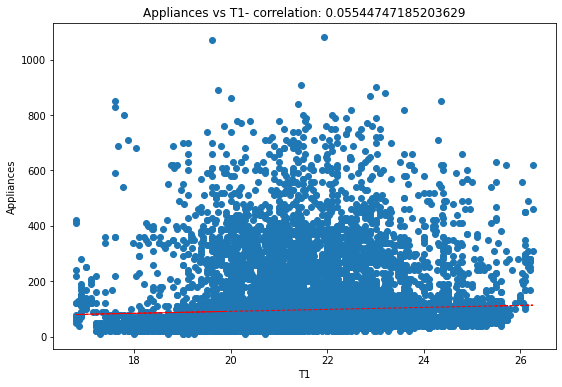

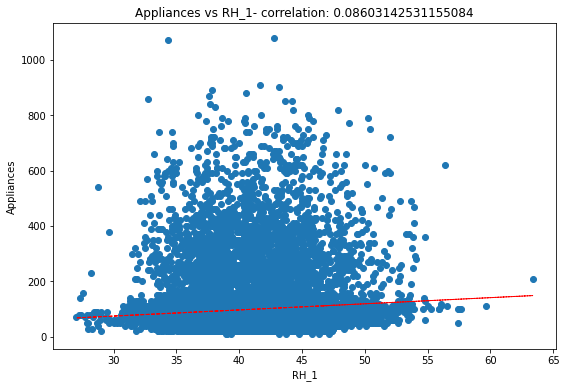

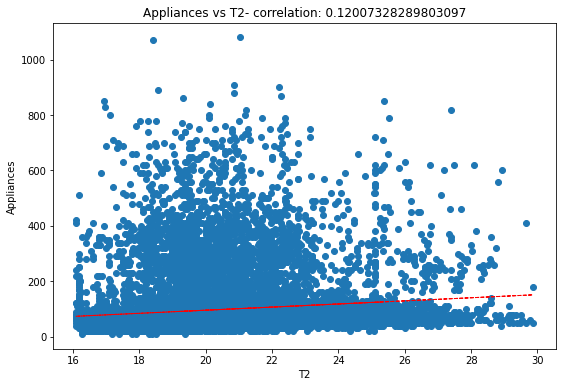

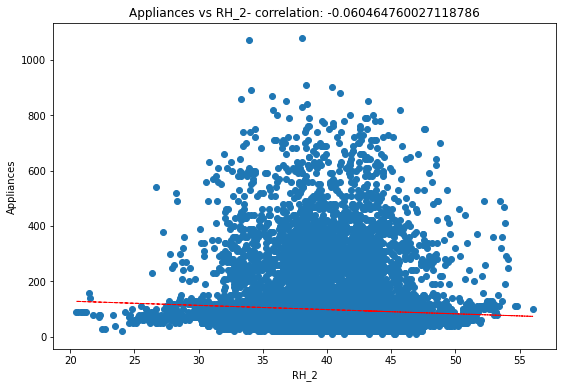

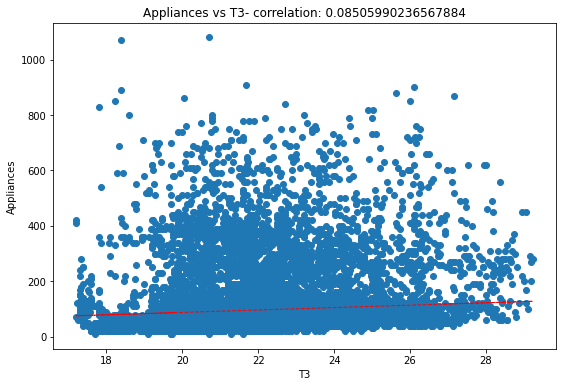

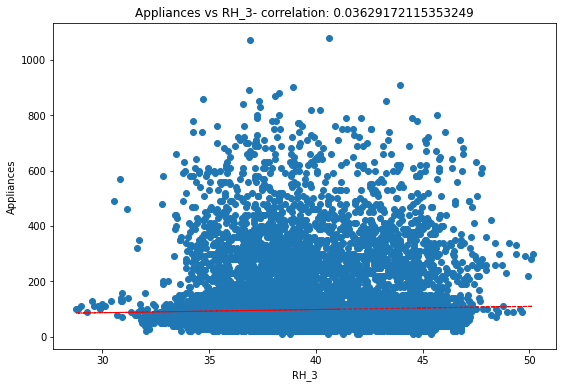

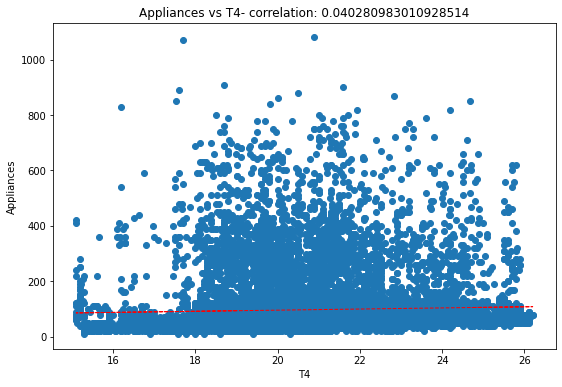

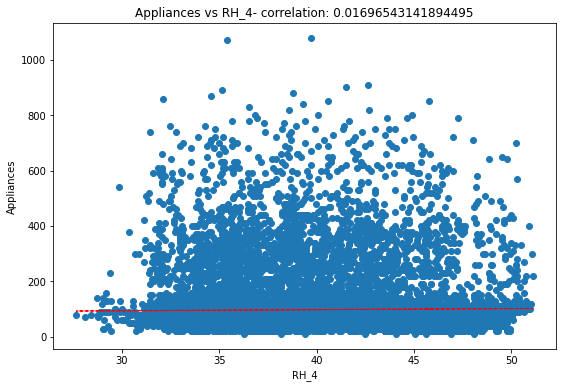

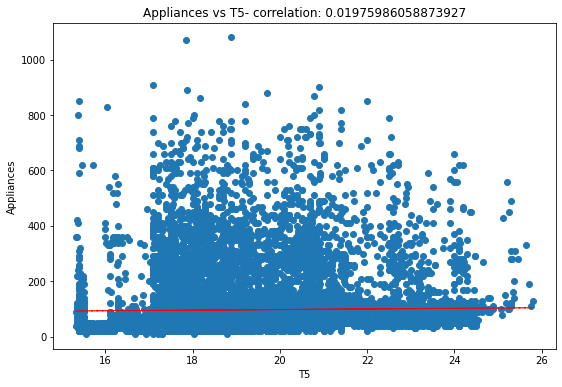

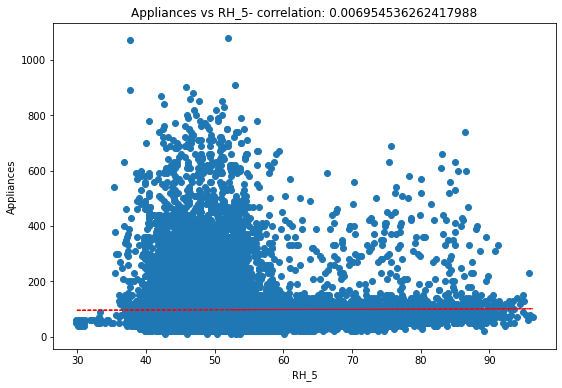

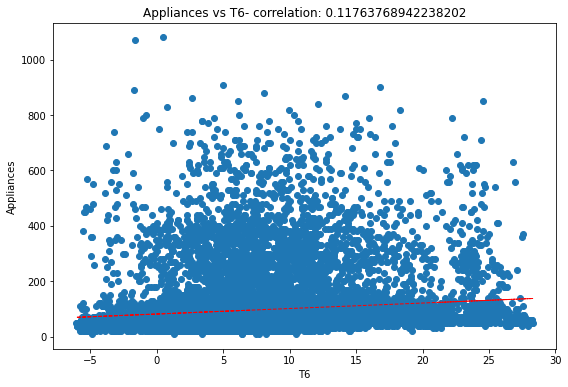

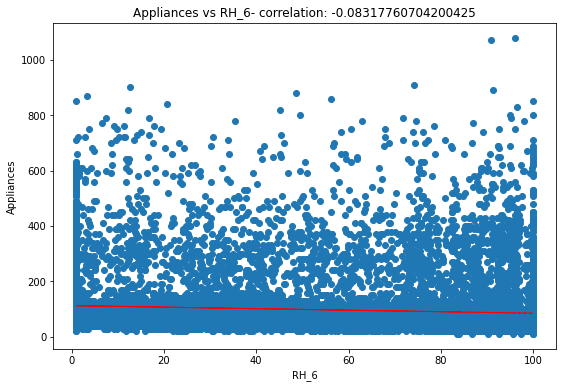

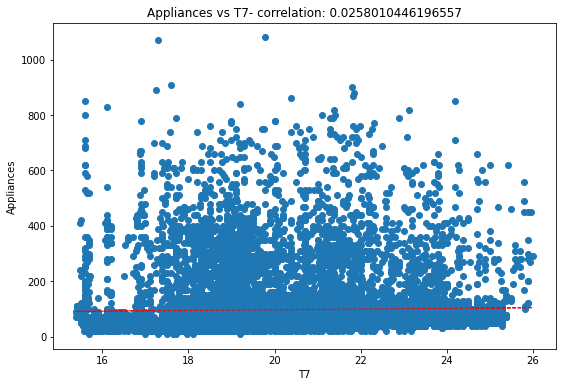

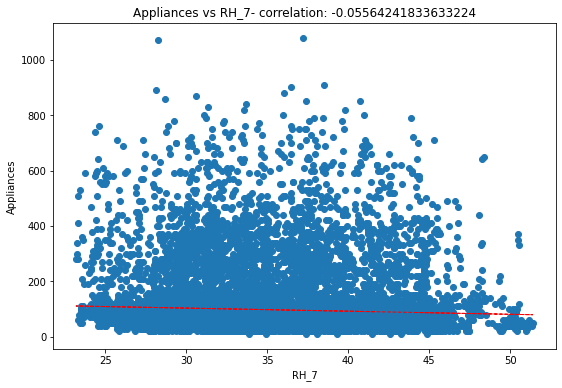

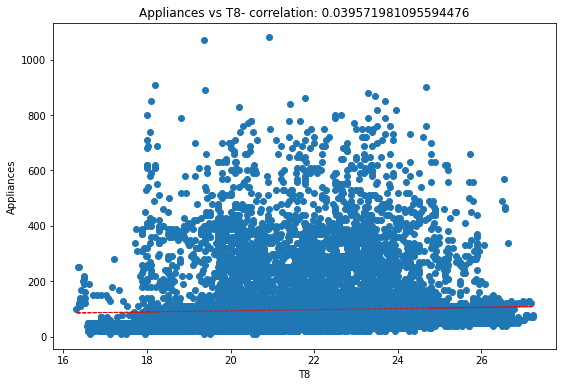

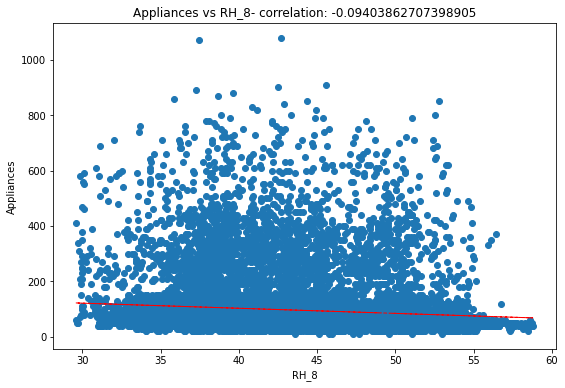

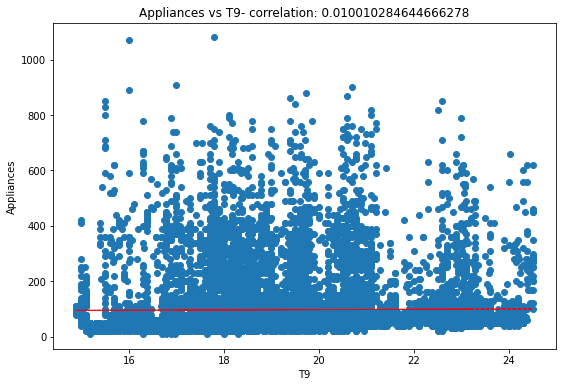

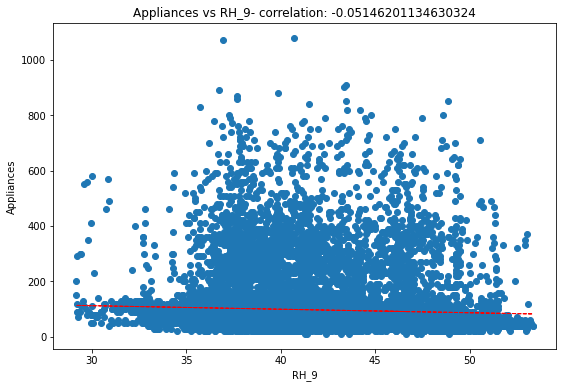

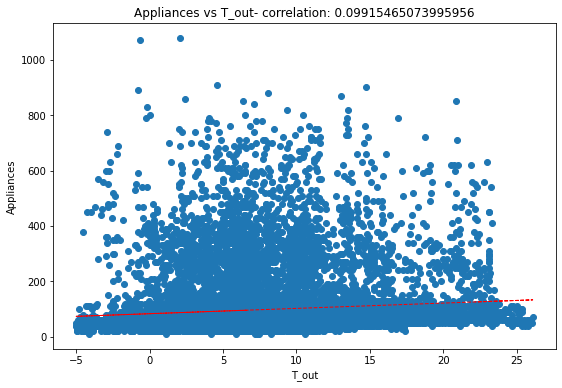

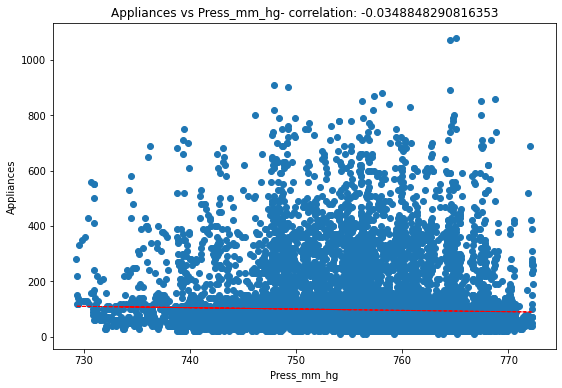

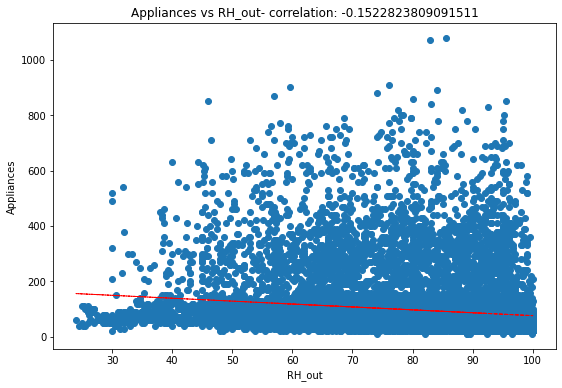

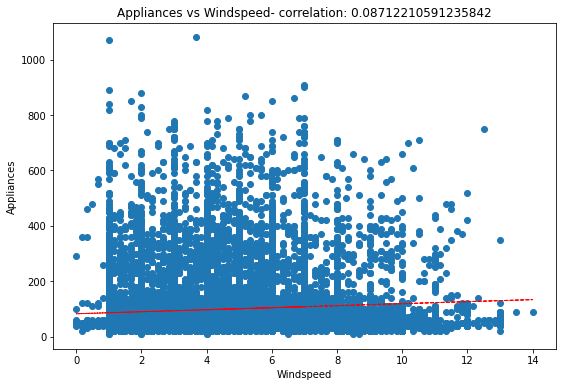

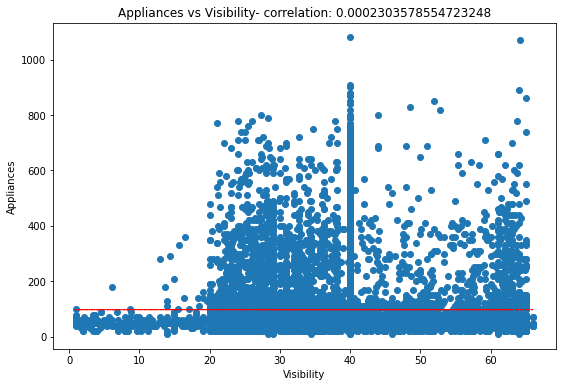

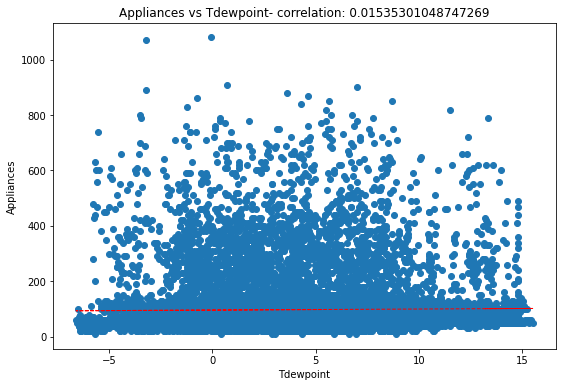

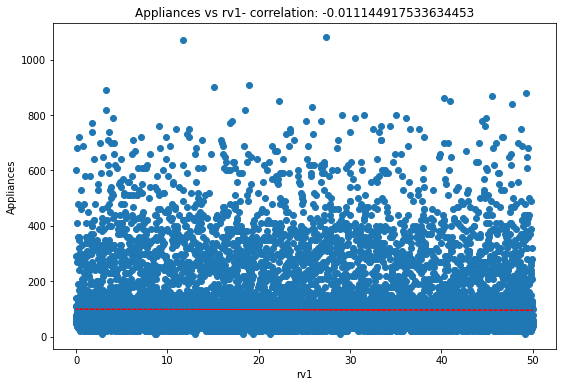

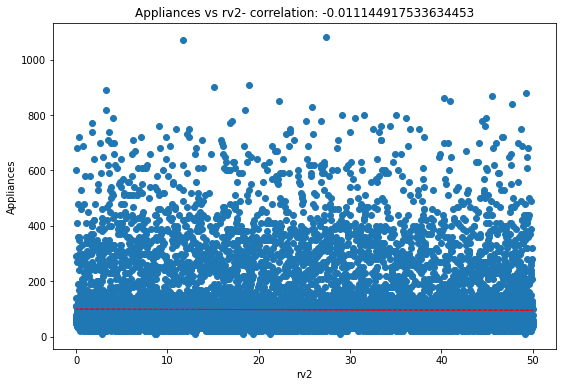

In [ ]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Appliances']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Appliances')
    ax.set_title('Appliances vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Appliances'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

# We do not see any pattern in the data

# Numerical Variables

Since the numerical values are skewed we will perform log normal distribution

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  27


Appliances     T1       RH_1  ...  Tdewpoint        rv1        rv2
0          60  19.89  47.596667  ...        5.3  13.275433  13.275433
1          60  19.89  46.693333  ...        5.2  18.606195  18.606195
2          50  19.89  46.300000  ...        5.1  28.642668  28.642668
3          50  19.89  46.066667  ...        5.0  45.410389  45.410389
4          60  19.89  46.333333  ...        4.9  10.084097  10.084097

[5 rows x 27 columns]

In [ ]:
continuous_feature=[feature for feature in numerical_features]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 27


# Outliers

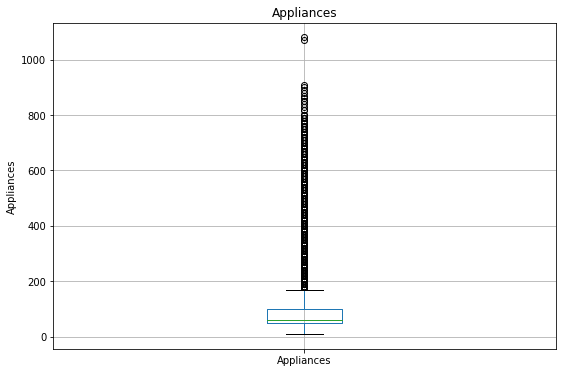

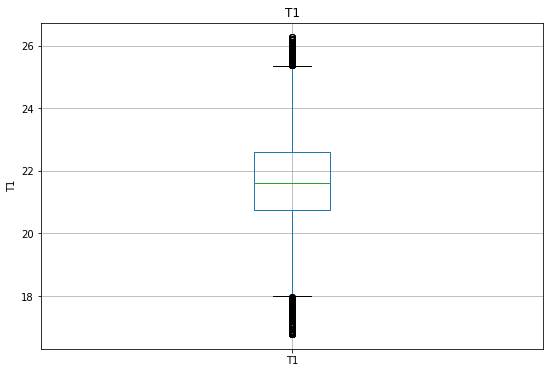

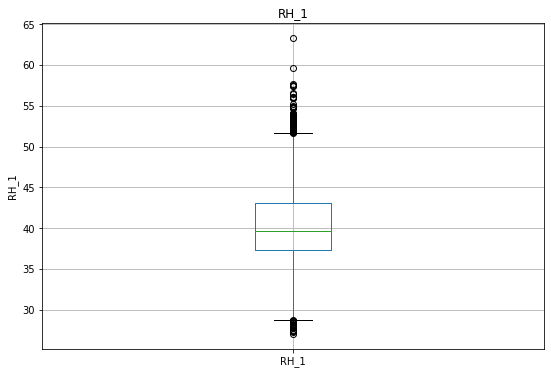

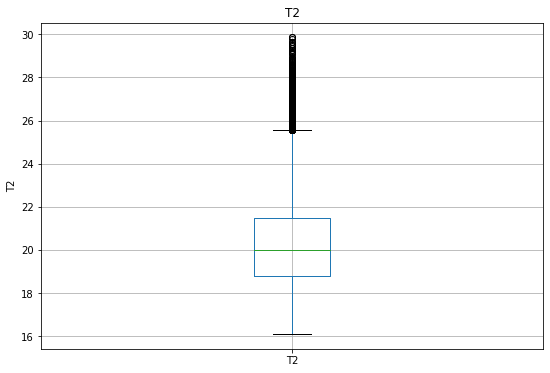

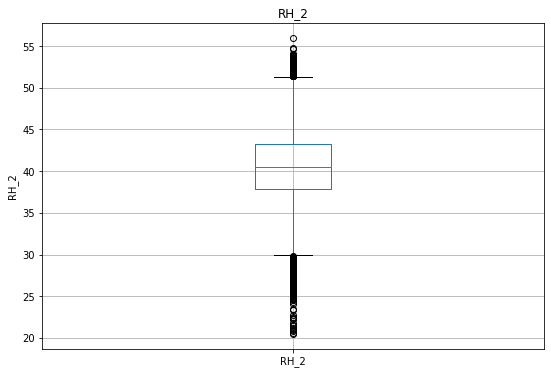

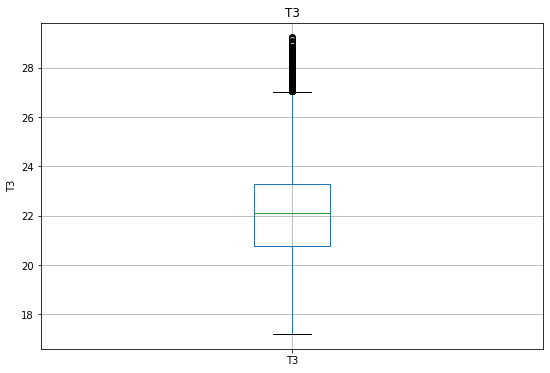

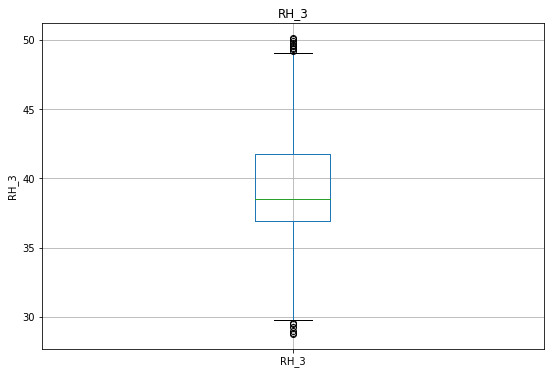

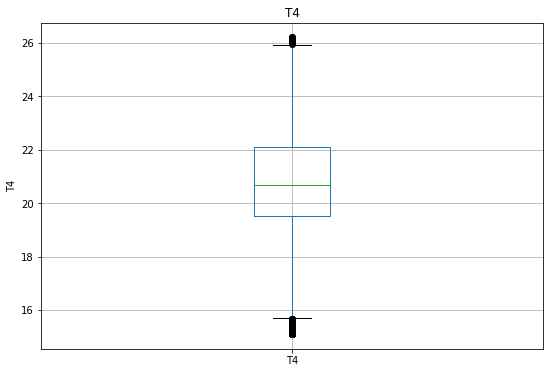

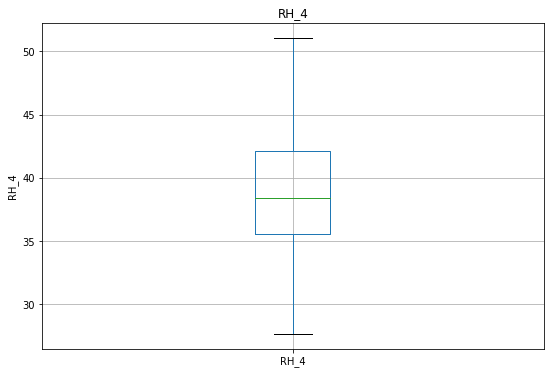

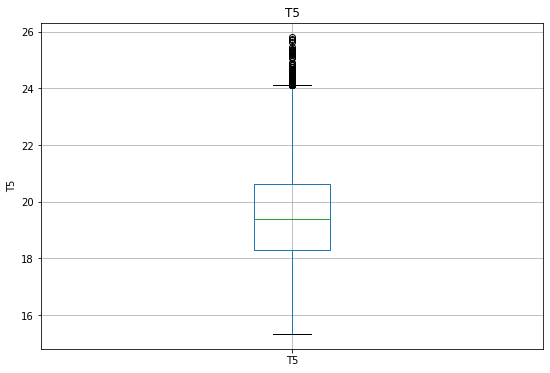

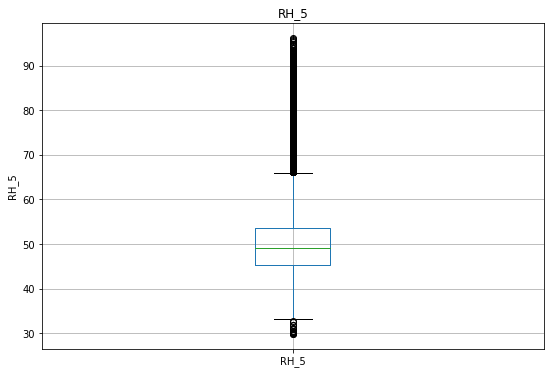

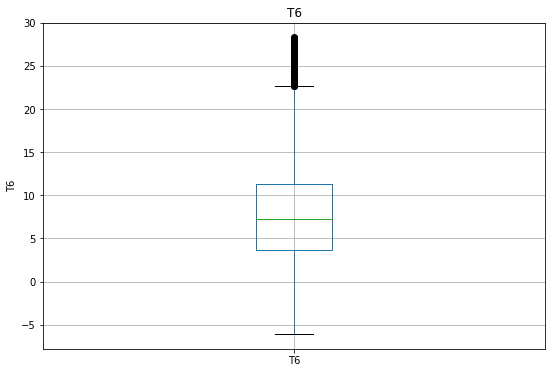

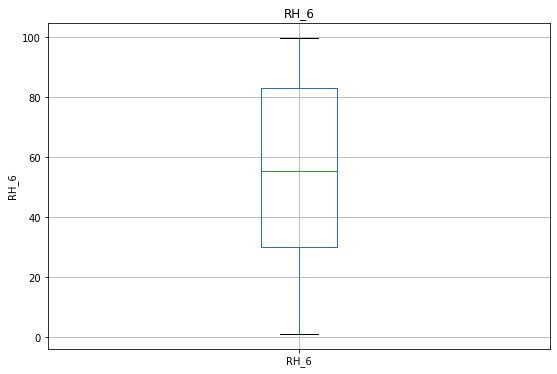

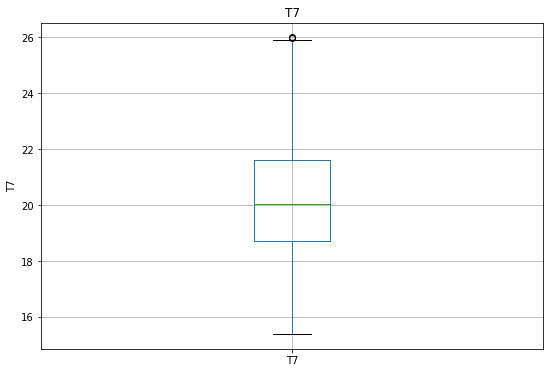

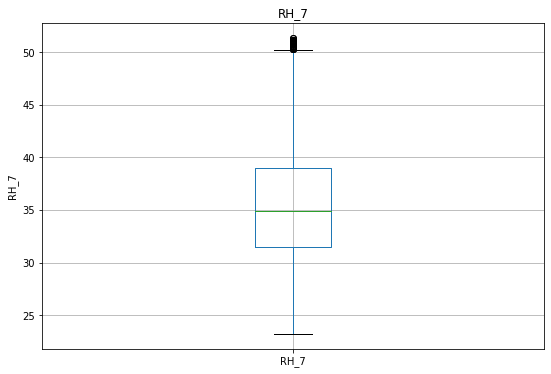

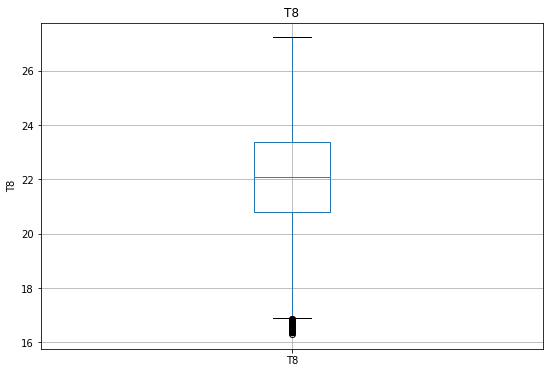

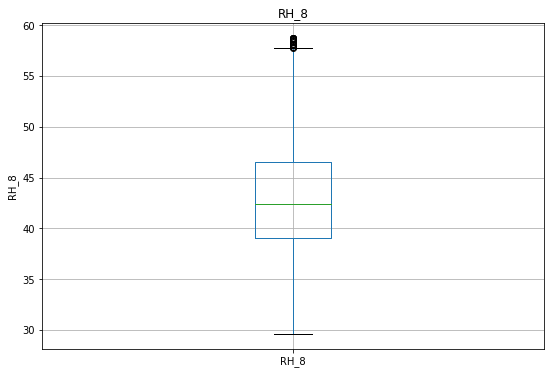

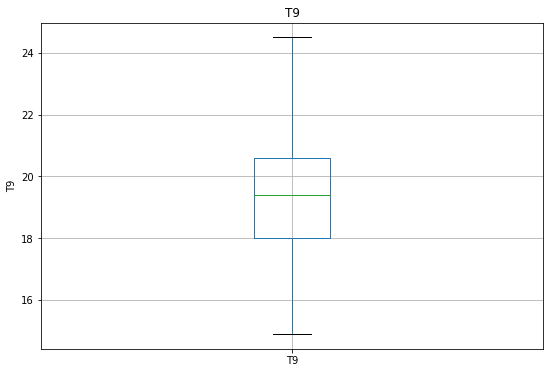

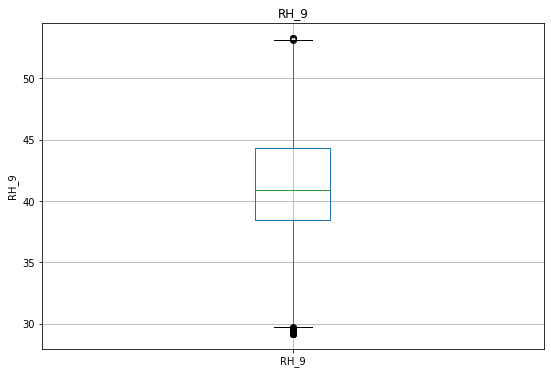

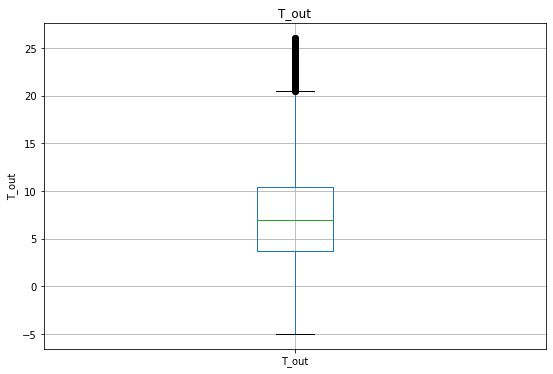

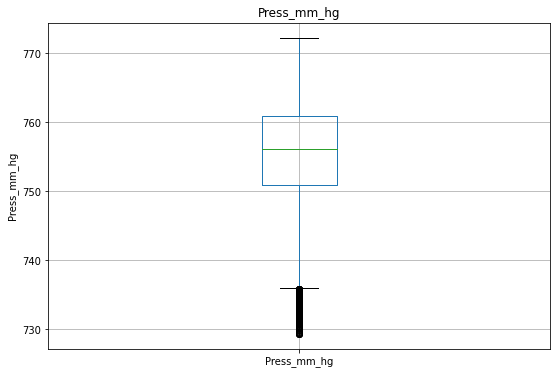

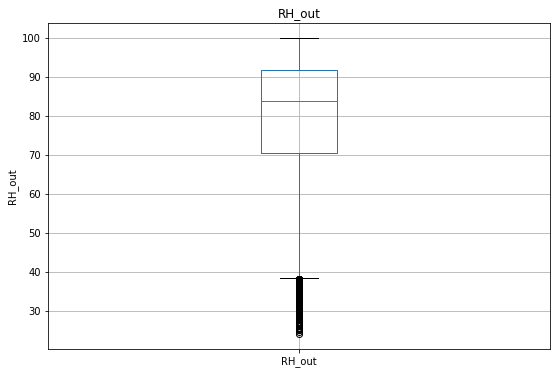

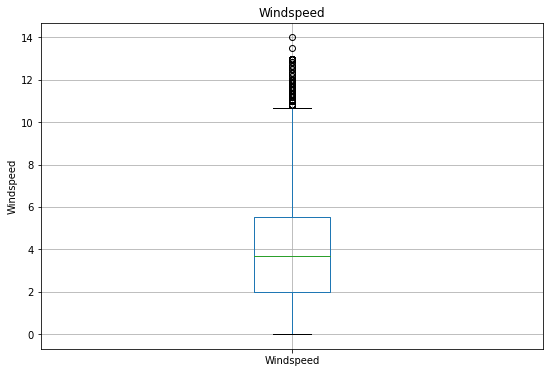

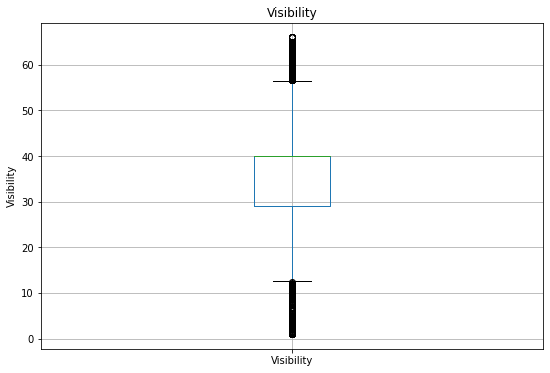

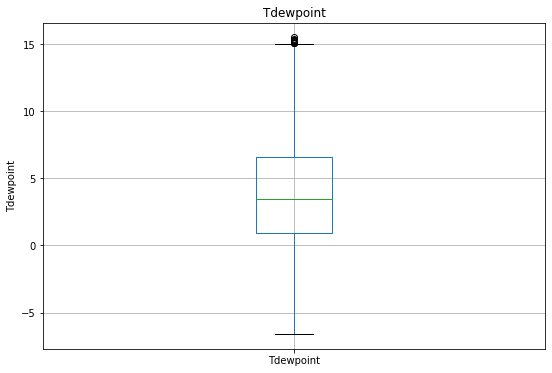

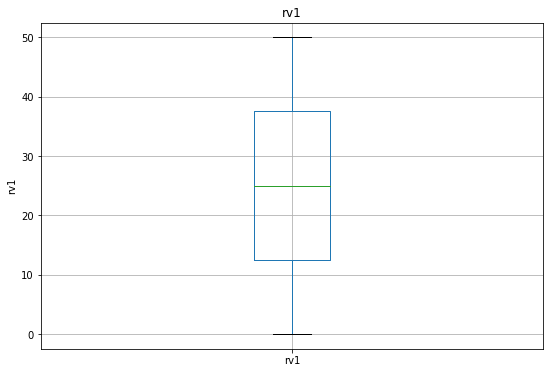

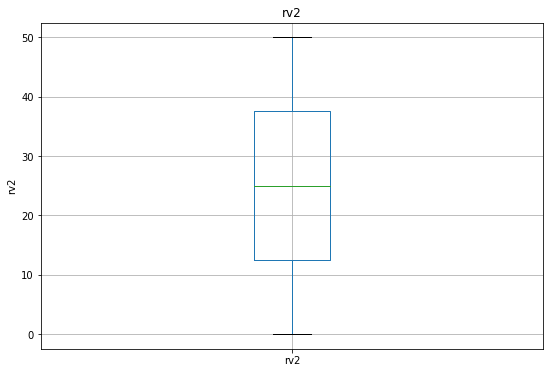

In [ ]:
for feature in continuous_feature:
    fig = plt.figure(figsize=(9, 6))
    data=df.copy()
    data[feature]=(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

# **Correlation Plot**

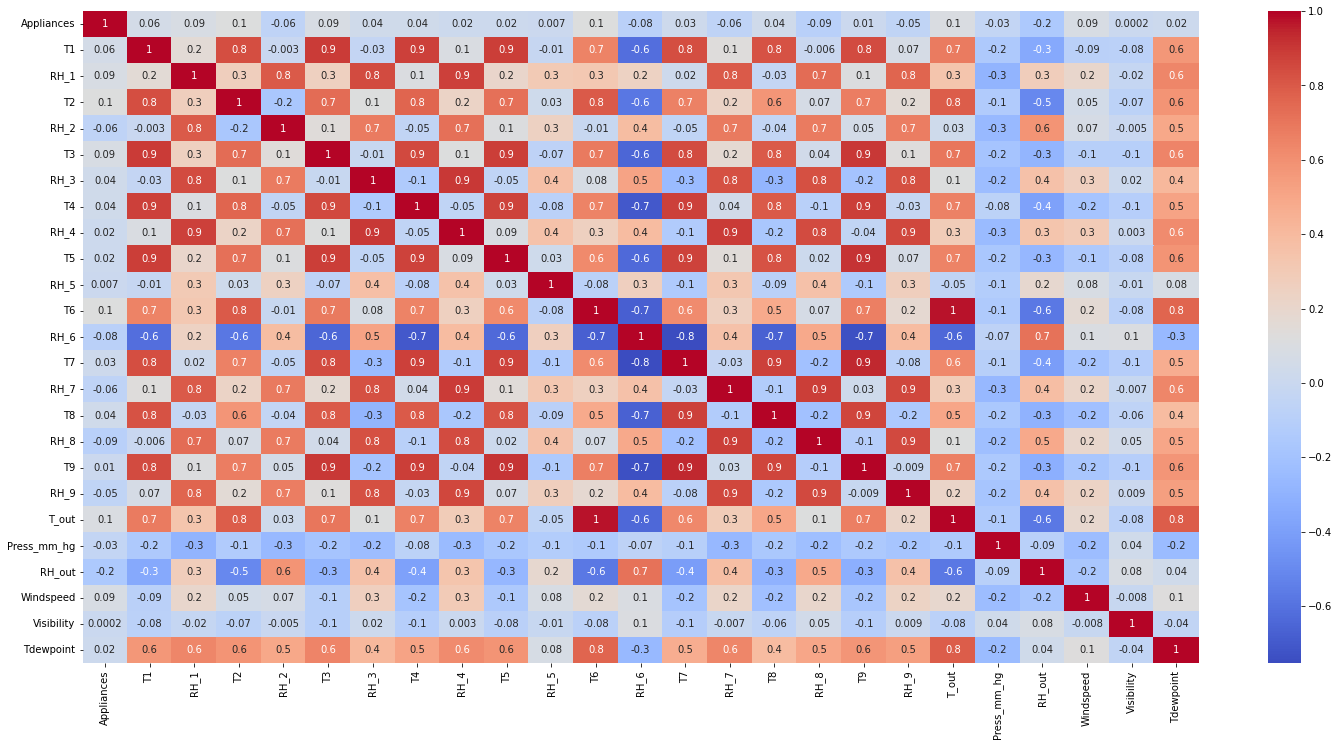

In [ ]:
plt.figure(figsize = (25,12))
sns.heatmap(df.iloc[:, :-2].corr(), annot = True, fmt='.1g',cmap='coolwarm')
plt.show()

# **Bivariate horizontal Scatter plot**

In [ ]:
df.columns

Index(['date', 'Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

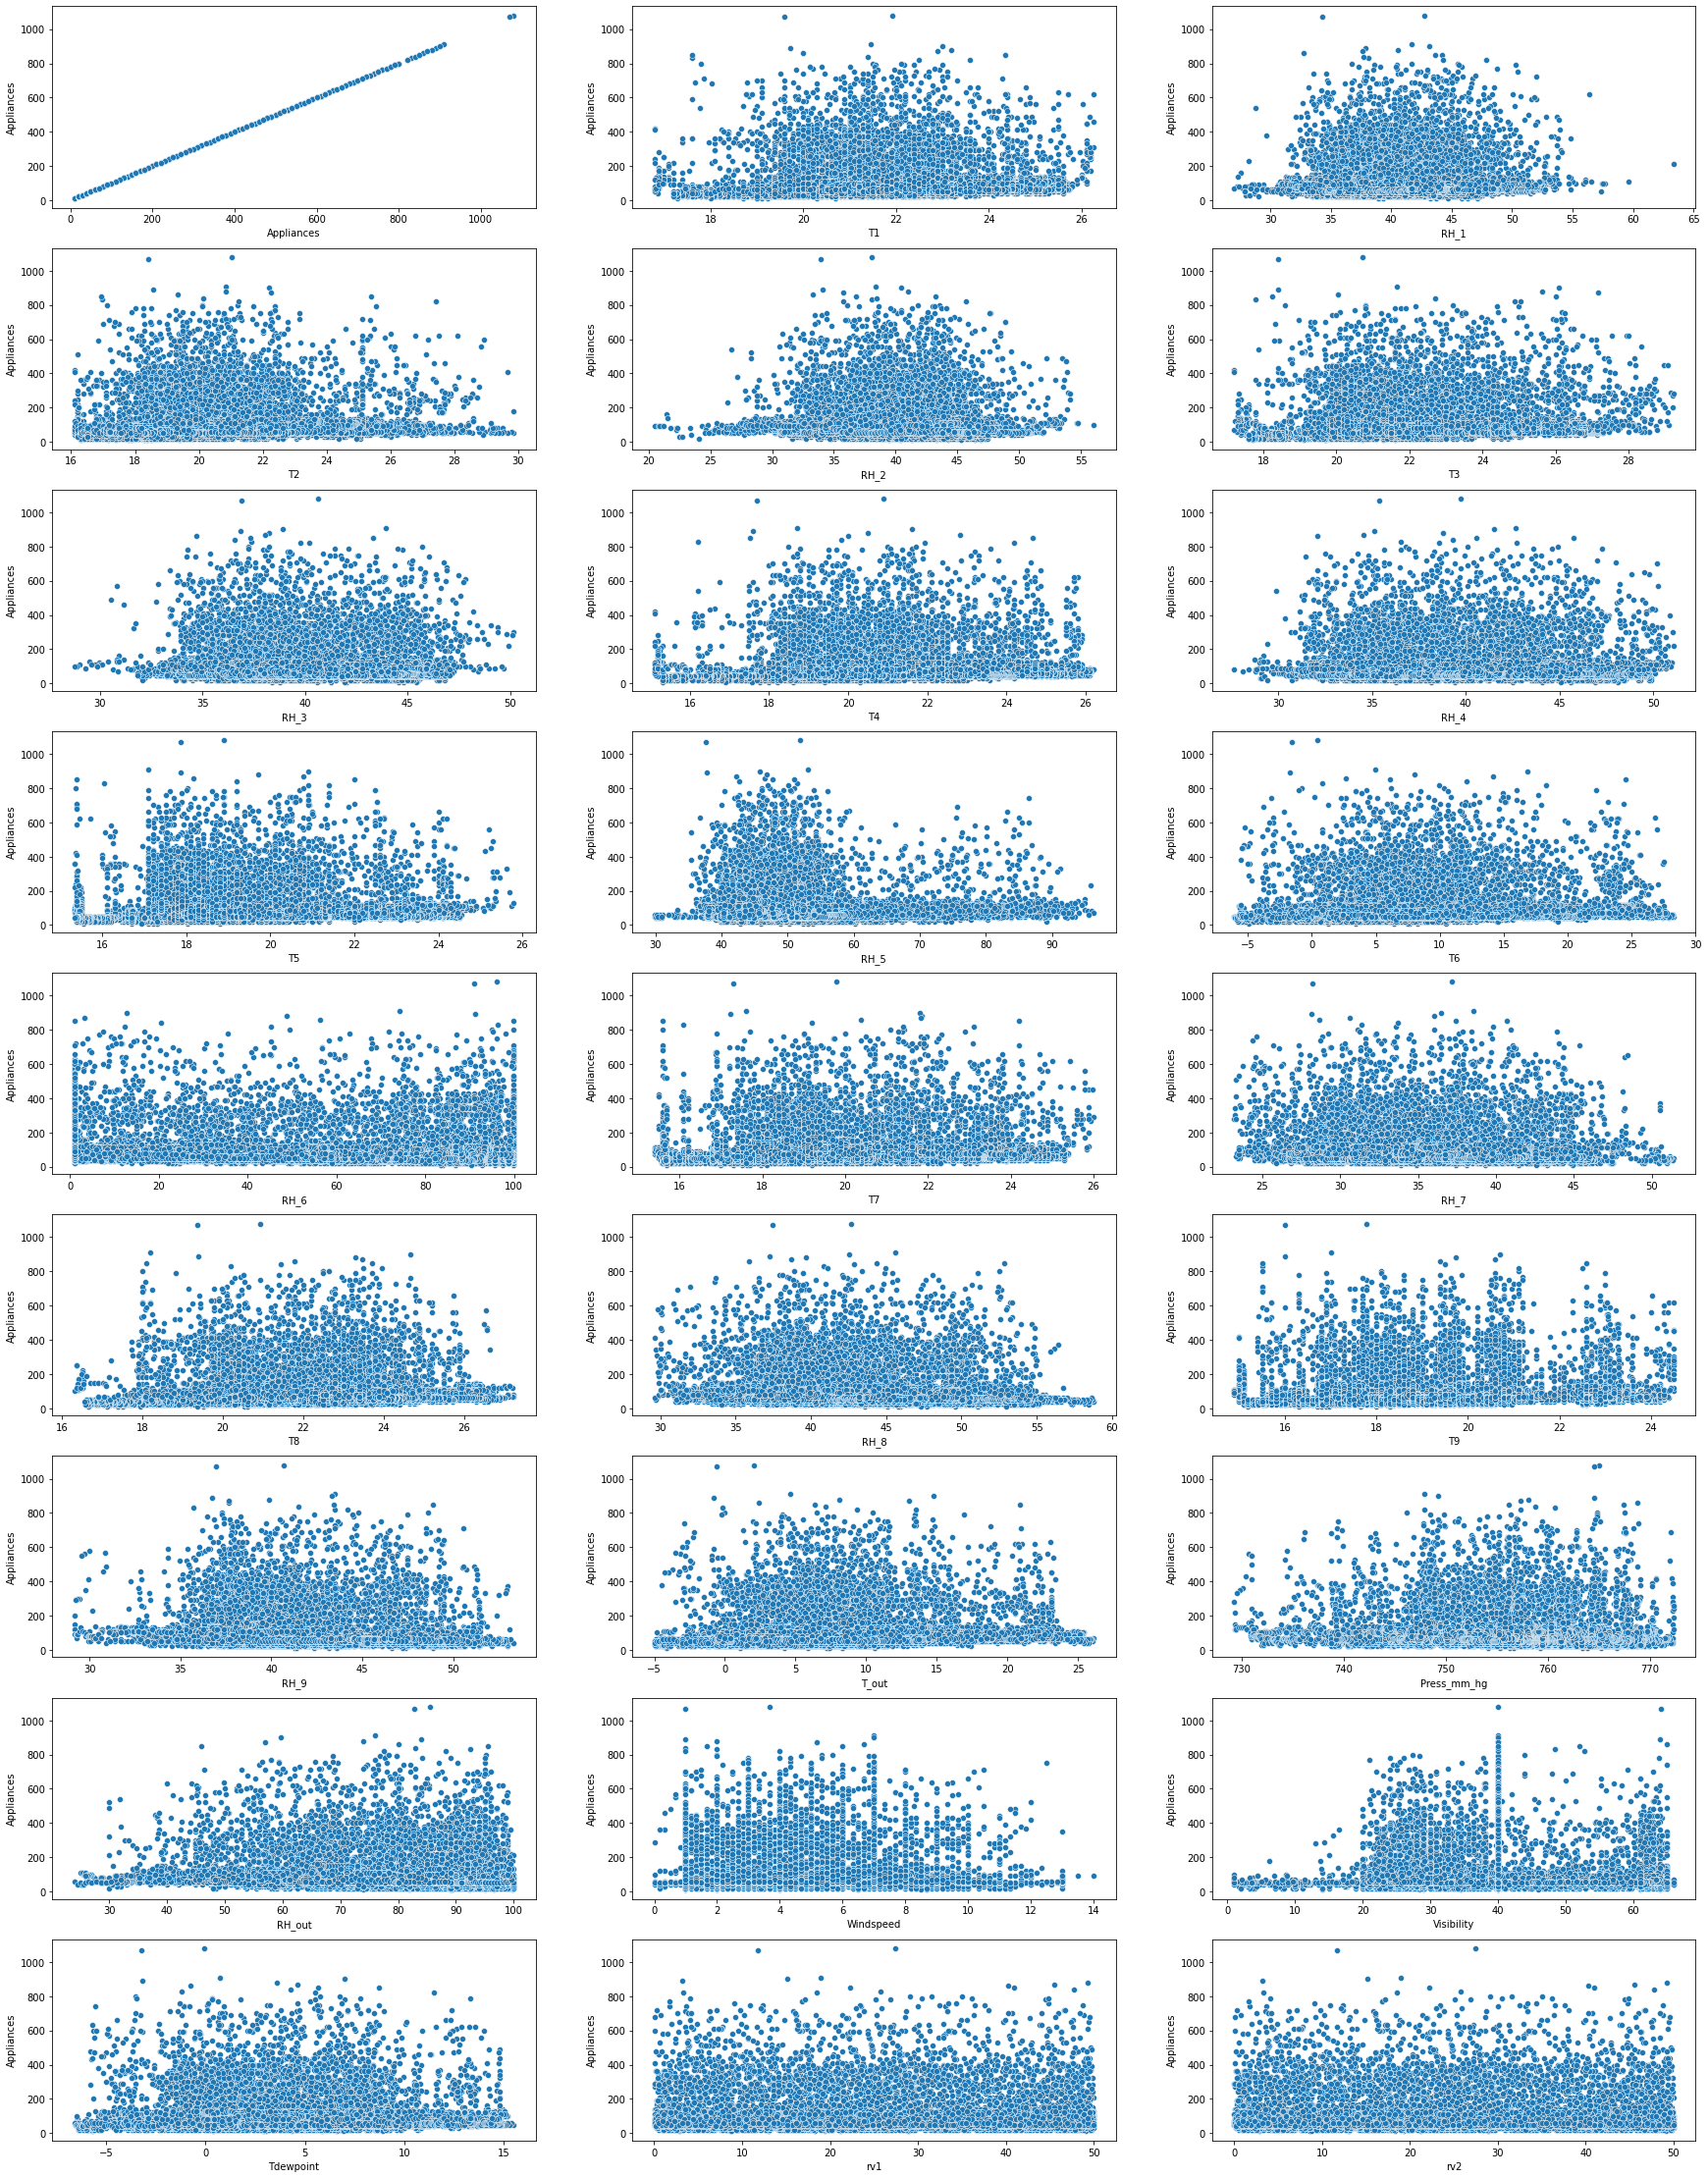

In [ ]:
feature_vars = list(df.columns[1:])

ls = []
colName = [j for j in df[feature_vars]]
a = 0
while a < 10:
    for i in range(3):
        ls.append((a, i))
    a+=1

fig, ax = plt.subplots(9, 3, figsize=(30, 40))
for k in range(27):
    sns.scatterplot(data=df, x=feature_vars[k], y=df['Appliances'], ax=ax[ls[k][0], ls[k][1]])


# **Extracting date time features from the date column**

In [ ]:
df.head()

date  Appliances     T1  ...  Tdewpoint        rv1        rv2
0  2016-01-11 17:00:00          60  19.89  ...        5.3  13.275433  13.275433
1  2016-01-11 17:10:00          60  19.89  ...        5.2  18.606195  18.606195
2  2016-01-11 17:20:00          50  19.89  ...        5.1  28.642668  28.642668
3  2016-01-11 17:30:00          50  19.89  ...        5.0  45.410389  45.410389
4  2016-01-11 17:40:00          60  19.89  ...        4.9  10.084097  10.084097

[5 rows x 28 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

# **Plotting Features Over Time**

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
fig = px.line(df, x='date', y=df.Appliances)
fig.show()



*   We can see that there peaks of high appliance usage and low appliance usage. This could probably indicate night time and day time.








*  There are two large gaps in appliance usage. 

 *   between 21 Jan 2016 and 30 Jan 2016
 *    between 1 April 2016 and 3 April 2016






# **Mean appliance usage with respect to different time features**

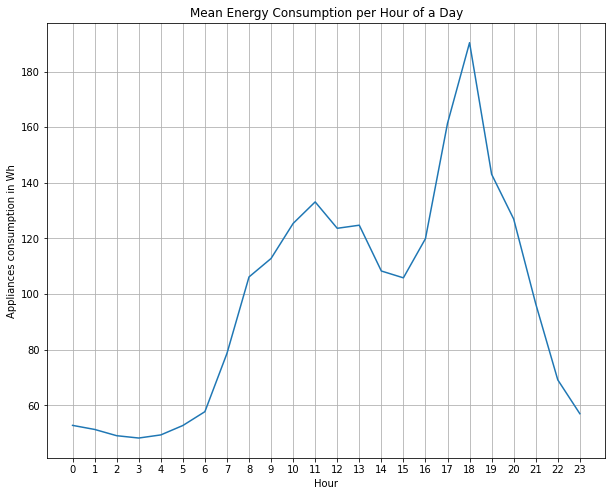

In [ ]:
# Mean Energy Consumption per Hour
from datetime import datetime
df['hour']=(df['date'].str.split(' ').str[1].str.split(':').str[0]).astype(int)
df.groupby('hour')['Appliances'].mean().plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks)
plt.grid()
plt.show()



1.   List itemDuring night time appliance usage is low.
2.   High during morning hours
3. And it peaks during the evening.


In [ ]:
from datetime import datetime

In [ ]:
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [ ]:
df['day_num'] = df['date'].apply(lambda x: datetime.strftime(x, '%w'))

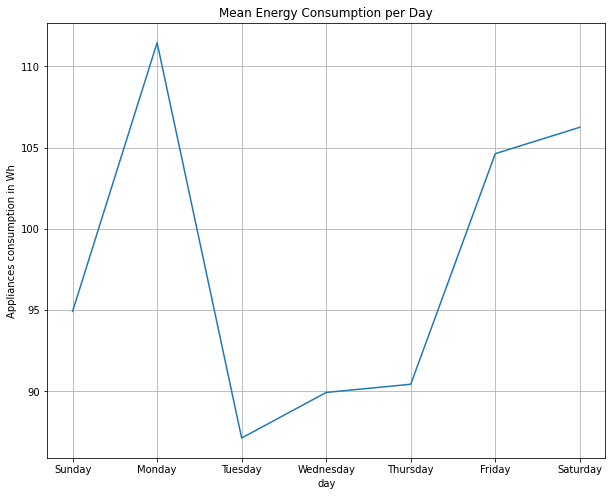

In [ ]:
# Mean Energy Consumption on different days of the week

df.groupby('day_num')['Appliances'].mean().plot(figsize=(10,8))
plt.xlabel('day')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 7, 1))
plt.title('Mean Energy Consumption per Day')

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks, labels=labels)
plt.grid()
plt.show()

In [ ]:
temp_dict = {
    'T1' : 'temp_kitchen', 'T2' : 'temp_living', 'T3' : 'temp_laundry', 
    'T4' : 'temp_office', 'T5' : 'temp_bath', 'T6' : 'temp_outside',
    'T7' : 'temp_iron', 'T8' : 'temp_teen', 'T9' : 'temp_parents', 'T_out' : 'temp_station'
}




In [ ]:
df = df.rename(columns=temp_dict)

In [ ]:
humid_dict = {
    'RH_1' : 'humid_kitchen', 'RH_2' : 'humid_living', 'RH_3' : 'humid_laundry', 
    'RH_4' : 'humid_office', 'RH_5' : 'humid_bath', 'RH_6' : 'humid_outside',
    'RH_7' : 'humid_iron', 'RH_8' : 'humid_teen', 'RH_9' : 'humid_parents', 'RH_out' : 'humid_station'
}


In [ ]:
df = df.rename(columns=humid_dict)

In [ ]:
df[temp_dict.values()].describe()

temp_kitchen   temp_living  ...  temp_parents  temp_station
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean      21.686571     20.341219  ...     19.485828      7.411665
std        1.606066      2.192974  ...      2.014712      5.317409
min       16.790000     16.100000  ...     14.890000     -5.000000
25%       20.760000     18.790000  ...     18.000000      3.666667
50%       21.600000     20.000000  ...     19.390000      6.916667
75%       22.600000     21.500000  ...     20.600000     10.408333
max       26.260000     29.856667  ...     24.500000     26.100000

[8 rows x 10 columns]

In [ ]:
df[humid_dict.values()].describe()

humid_kitchen  humid_living  ...  humid_parents  humid_station
count   19735.000000  19735.000000  ...   19735.000000   19735.000000
mean       40.259739     40.420420  ...      41.552401      79.750418
std         3.979299      4.069813  ...       4.151497      14.901088
min        27.023333     20.463333  ...      29.166667      24.000000
25%        37.333333     37.900000  ...      38.500000      70.333333
50%        39.656667     40.500000  ...      40.900000      83.666667
75%        43.066667     43.260000  ...      44.338095      91.666667
max        63.360000     56.026667  ...      53.326667     100.000000

[8 rows x 10 columns]

In [ ]:
weather_cols = list(set(df.columns) - set(list(temp_dict.values())) - set(list(humid_dict.values())) - {'Appliances', 'lights', 'rv1', 'rv2'})
weather_cols

['day_num',
 'hour',
 'Press_mm_hg',
 'date',
 'Tdewpoint',
 'Windspeed',
 'Visibility']

Text(0, 0.5, 'Appliance energy (Wh)')

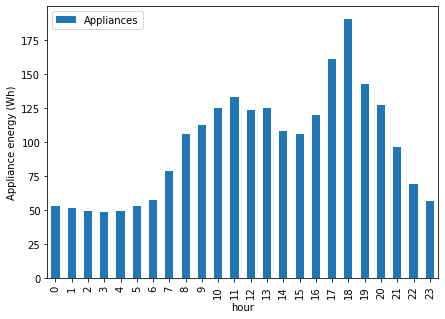

In [ ]:
df['weekday'] = ((pd.to_datetime(df['date']).dt.dayofweek)// 5 == 0).astype(int)
df['hour'] = pd.to_datetime(df['date']).dt.hour
df['month'] = pd.to_datetime(df['date']).dt.month
fig, ax = plt.subplots(1,1,figsize=(7,5))
df.groupby('hour').agg({'Appliances' : 'mean'}).plot.bar(ax=ax)
ax.set_ylabel('Appliance energy (Wh)')

Text(0, 0.5, 'Appliance Energy (Wh)')

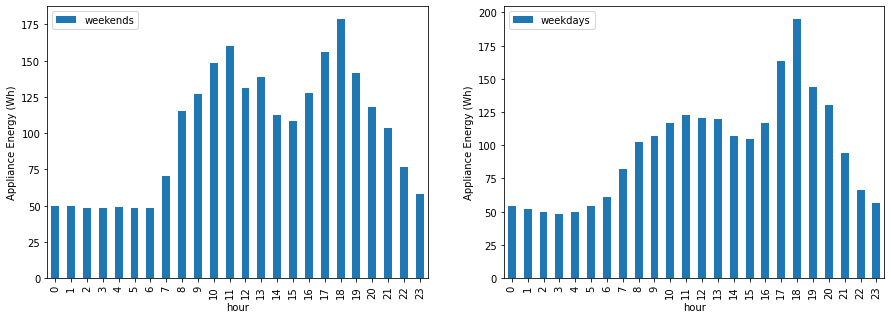

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
week_df = df.groupby(['weekday','hour']).agg({'Appliances':'mean'}).reset_index(0)
week_df[week_df.weekday==0].Appliances.plot.bar(ax=ax[0], label='weekends')
week_df[week_df.weekday==1].Appliances.plot.bar(ax=ax[1], label='weekdays')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[0].set_ylabel('Appliance Energy (Wh)')
ax[1].set_ylabel('Appliance Energy (Wh)')

# **Lets look at the dependence of appliance energy consumption on newly created variables !**

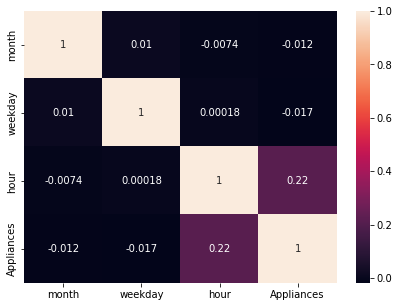

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
sns.heatmap(df[['month', 'weekday', 'hour', 'Appliances']].corr(), annot=True, ax=ax)

# As we have observed earlier as well, there seenms to be no correlation between month and the observed energy use i.e. the enegy consumption pretty much remains similar over all months. Similarly there is no direct effect of weekdays on appliance energy consumption.
# Although there is a correlation of 0.22 between hour and appliances

In [ ]:
df[['temp_outside', 'humid_outside']].corr()

temp_outside  humid_outside
temp_outside       1.000000      -0.672137
humid_outside     -0.672137       1.000000

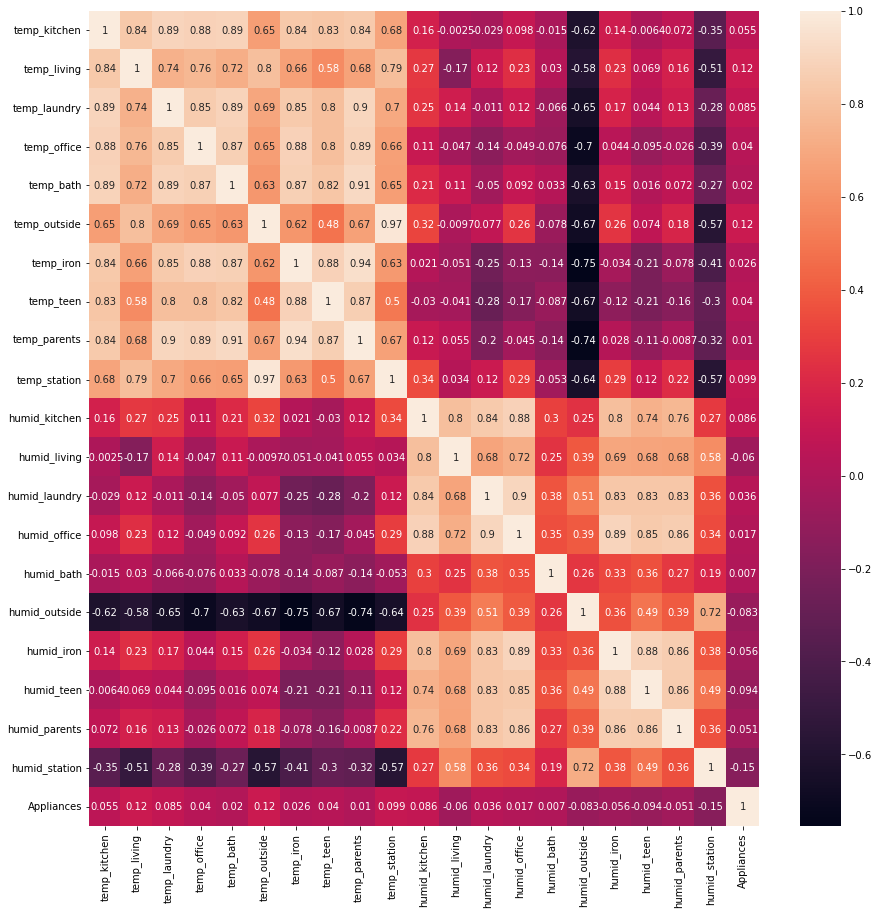

In [ ]:
cols = list(temp_dict.values())
cols.extend(list(humid_dict.values()))
cols.extend(['Appliances'])
fig, ax = plt.subplots(1,1,figsize=(15,15))
sns.heatmap(df[cols].corr(), ax=ax, annot=True)

In [ ]:
weather_cols

['day_num',
 'hour',
 'Press_mm_hg',
 'date',
 'Tdewpoint',
 'Windspeed',
 'Visibility']

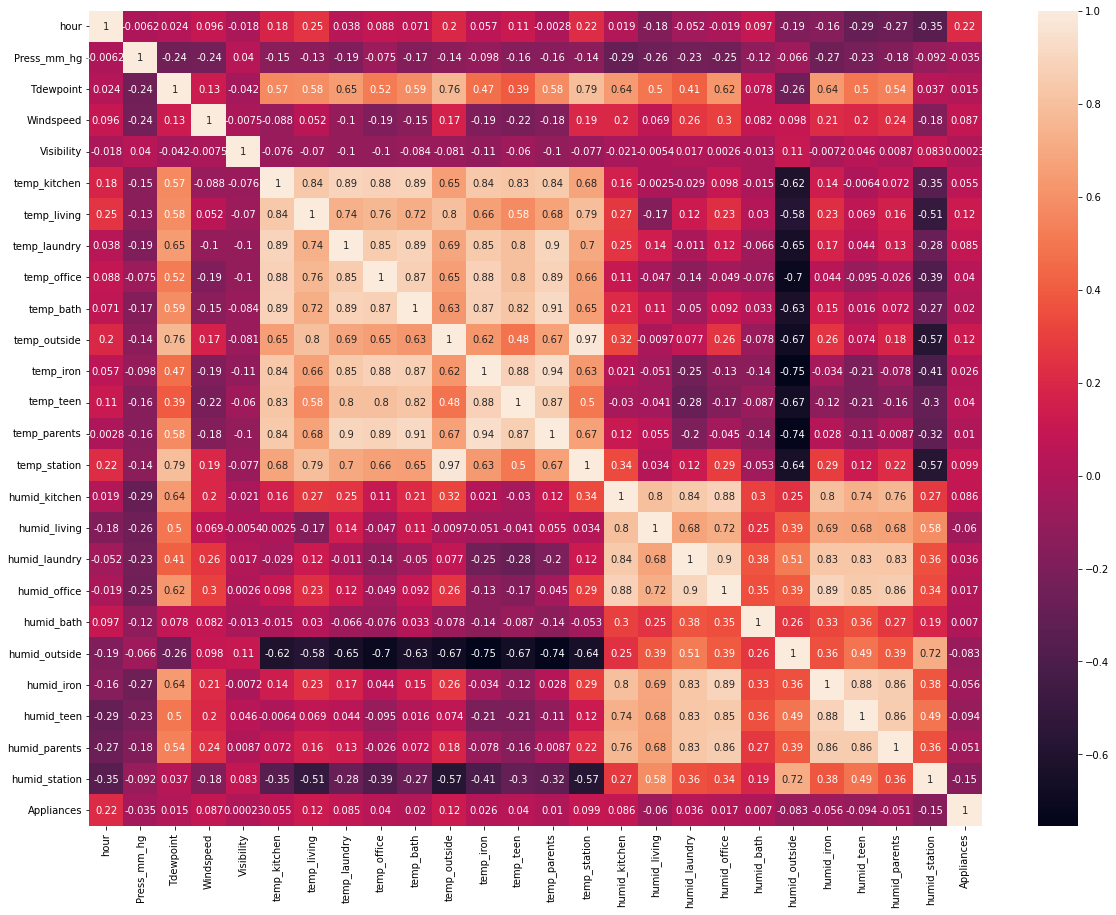

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(20,15))
sns.heatmap(df[weather_cols + cols].corr(), ax = ax, annot=True)

# Tdewpoint shows a high correlation with most of the tempearture and humidity level features than any other weather parameters. Pressure, windspeed and visibiltiy show little to no correlation. We might need to include these only these feaatures in our final model

# Lets now deep dive into reducing the temperature and humidity parameters through some feature engineering and come up with features that explain maximum variability.

In [ ]:
temp_cols = list(set(list(temp_dict.values())) - {'temp_outside', 'temp_station'})
df['mean_temp'] = df[temp_cols].mean(axis=1)
df[['mean_temp', 'Appliances']].corr()

mean_temp  Appliances
mean_temp     1.00000     0.05474
Appliances    0.05474     1.00000

# Since most of the temperature variables inside the room show little to know correlation with target variable, lets try to find components that could explain maximum variance, which might improve the correlation with target variable as well.

# Before doing PCA, I need to split the data into train and test, and fit PCA on train set

# **PCA on temperatures**

In [ ]:
df.columns

Index(['date', 'Appliances', 'temp_kitchen', 'humid_kitchen', 'temp_living',
       'humid_living', 'temp_laundry', 'humid_laundry', 'temp_office',
       'humid_office', 'temp_bath', 'humid_bath', 'temp_outside',
       'humid_outside', 'temp_iron', 'humid_iron', 'temp_teen', 'humid_teen',
       'temp_parents', 'humid_parents', 'temp_station', 'Press_mm_hg',
       'humid_station', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2',
       'hour', 'day_num', 'weekday', 'month', 'mean_temp'],
      dtype='object')

In [ ]:
train_energy_df, test_energy_df = train_test_split(df, test_size=0.2, random_state=1)

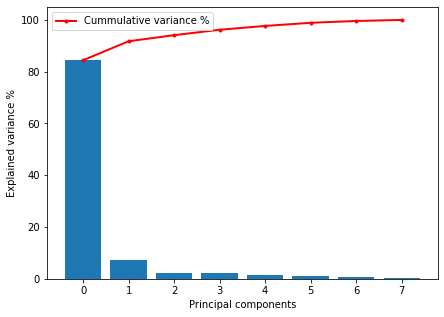

In [ ]:
pca = PCA()
pca.fit(train_energy_df[temp_cols])
temp_pca = pca.transform(df[temp_cols])
variance = pca.explained_variance_ratio_*100
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.bar(range(len(variance)), variance)
ax.plot(range(len(variance)), np.cumsum(variance),'r.-',linewidth=2, label='Cummulative variance %')
ax.set_xlabel('Principal components')
ax.set_ylabel('Explained variance %')
plt.legend(loc='best')

In [ ]:
variance

array([84.42749838,  7.33014216,  2.3562388 ,  2.09550508,  1.47195967,
        1.21891325,  0.69977714,  0.39996553])

First two components seem to explain more than 91 % of variance in data.

In [ ]:
for i in range(temp_pca.shape[1]):
  df[f'temp_pca{i+1}'] = temp_pca[:,i]

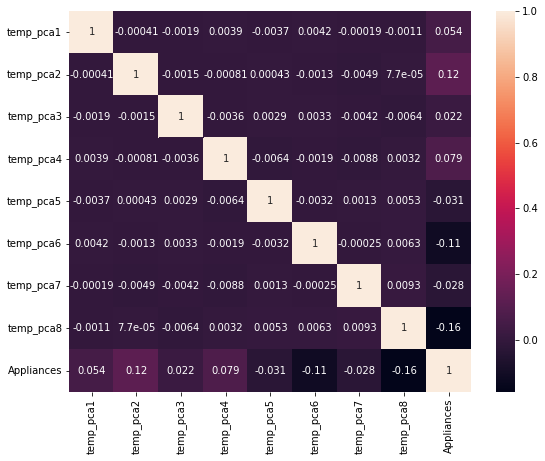

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(9,7))
sns.heatmap(df[['temp_pca1', 'temp_pca2', 'temp_pca3', 'temp_pca4','temp_pca5', 'temp_pca6', 'temp_pca7', 'temp_pca8', 'Appliances']].corr() , ax = ax, annot=True)

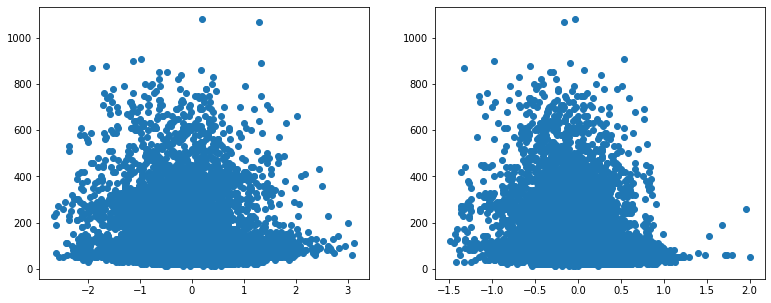

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(13,5))
for i, j in enumerate((6,8)):
  axes[i].scatter(df[f'temp_pca{j}'], df['Appliances'])

In [ ]:
#Lets look at components of humid_pca4
dict(zip(temp_cols, pca.components_[7,:]))

{'temp_bath': -0.21732855159144737,
 'temp_iron': -0.2402654099158844,
 'temp_kitchen': 0.6252020918393111,
 'temp_laundry': -0.2968959599105862,
 'temp_living': -0.11736304703987945,
 'temp_office': -0.09845473026092971,
 'temp_parents': 0.6025874320322215,
 'temp_teen': -0.17157195238503223}

# **PCA on humidity**

In [ ]:
humid_cols = list(set(list(humid_dict.values())) - {'humid_outside', 'humid_station'})
df['mean_humid'] = df[temp_cols].mean(axis=1)
df[['mean_humid', 'Appliances']].corr()

mean_humid  Appliances
mean_humid     1.00000     0.05474
Appliances     0.05474     1.00000

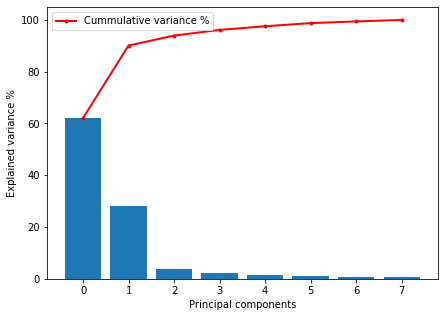

In [ ]:
pca = PCA()
pca.fit(train_energy_df[humid_cols])
humid_pca = pca.transform(df[humid_cols])
variance = pca.explained_variance_ratio_*100
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.bar(range(len(variance)), variance)
ax.plot(range(len(variance)), np.cumsum(variance),'r.-',linewidth=2, label='Cummulative variance %')
ax.set_xlabel('Principal components')
ax.set_ylabel('Explained variance %')
plt.legend(loc='best')

In [ ]:
variance

array([62.09137315, 28.02035975,  3.84761759,  2.19313449,  1.40502588,
        1.22143306,  0.64956943,  0.57148664])

In [ ]:
for i in range(humid_pca.shape[1]):
  df[f'humid_pca{i+1}'] = humid_pca[:,i]

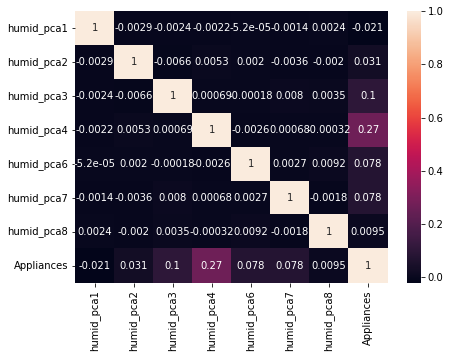

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(7,5))
sns.heatmap(df[['humid_pca1', 'humid_pca2', 'humid_pca3', 'humid_pca4', 'humid_pca6', 'humid_pca7', 'humid_pca8', 'Appliances']].corr(), ax = ax, annot=True)

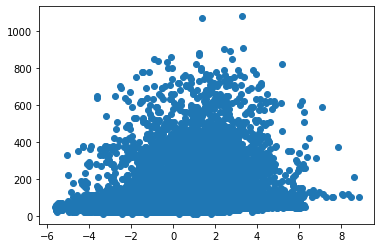

In [ ]:
plt.scatter(df['humid_pca4'], df['Appliances'])

In [ ]:
#Lets look at components of humid_pca4
dict(zip(humid_cols, pca.components_[3,:]))

{'humid_bath': -0.005052352457213548,
 'humid_iron': 0.07897694512980646,
 'humid_kitchen': 0.4123122284268885,
 'humid_laundry': 0.29088037088150853,
 'humid_living': -0.5395785231761466,
 'humid_office': 0.41021262197258773,
 'humid_parents': -0.018904279237058702,
 'humid_teen': -0.528533444850988}

In [ ]:
df['diff_temp'] = df['temp_outside'] - df['mean_temp']
df[['diff_temp', 'Appliances']].corr()

diff_temp  Appliances
diff_temp     1.00000     0.12411
Appliances    0.12411     1.00000

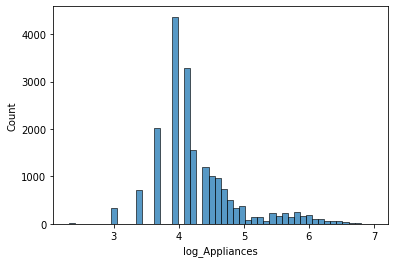

In [ ]:
df['log_Appliances'] = np.log(df['Appliances'])
sns.histplot(df.log_Appliances,bins=50)

# **Modeling with PCA features**

In [ ]:
final_features = ['temp_pca1', 'temp_pca2', 'humid_pca1', 'humid_pca2', 'temp_outside', 'humid_outside', 'weekday', 'Windspeed', 'Press_mm_hg', 'Appliances']

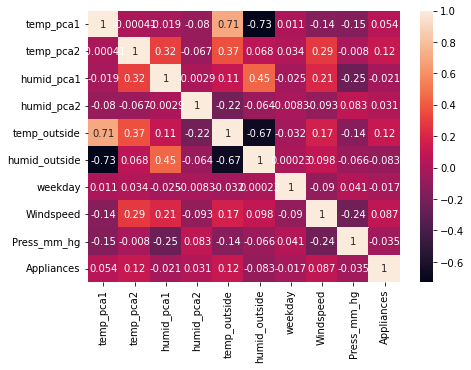

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(7,5))
sns.heatmap(df[final_features].corr(), ax = ax, annot=True)

In [ ]:
final_train_df, final_test_df = train_test_split(df[final_features], test_size = 0.2, random_state = 1)

In [ ]:
X_train, y_train = final_train_df.drop('Appliances', axis=1), final_train_df['Appliances']
X_test, y_test = final_test_df.drop('Appliances', axis=1), final_test_df['Appliances']

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.values.reshape([-1,1])).flatten()
y_test = sc_y.transform(y_test.values.reshape([-1,1])).flatten()

The ML regressor models that we use are :

Lasso Regressor
Ridge Regressor
KNeighbors Regressor
Support Vector Regressor
Random Forest Regressor
Extra Tree Regressor
Gradient Boosting Regressor
XGB Regressor
MLP Regressor

In [97]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [98]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

[10:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [99]:
results_df = df = pd.DataFrame(model_data)

In [100]:
results_df

Name  Train_Time  ...  Test_R2_Score  Test_RMSE_Score
0                      Lasso:     0.005144  ...      -0.000777         1.028791
1                      Ridge:     0.002629  ...       0.031485         1.012072
2        KNeighborsRegressor:     0.055402  ...       0.485613         0.737570
3                         SVR:   11.165659  ...       0.086442         0.982939
4                RandomForest    12.873619  ...       0.568354         0.675651
5         ExtraTreeRegressor :    3.478909  ...       0.649299         0.609013
6  GradientBoostingRegressor:     3.730968  ...       0.164990         0.939732
7               XGBRegressor:     0.916592  ...       0.165185         0.939623
8               MLPRegressor:     6.039080  ...       0.218679         0.909019

[9 rows x 5 columns]

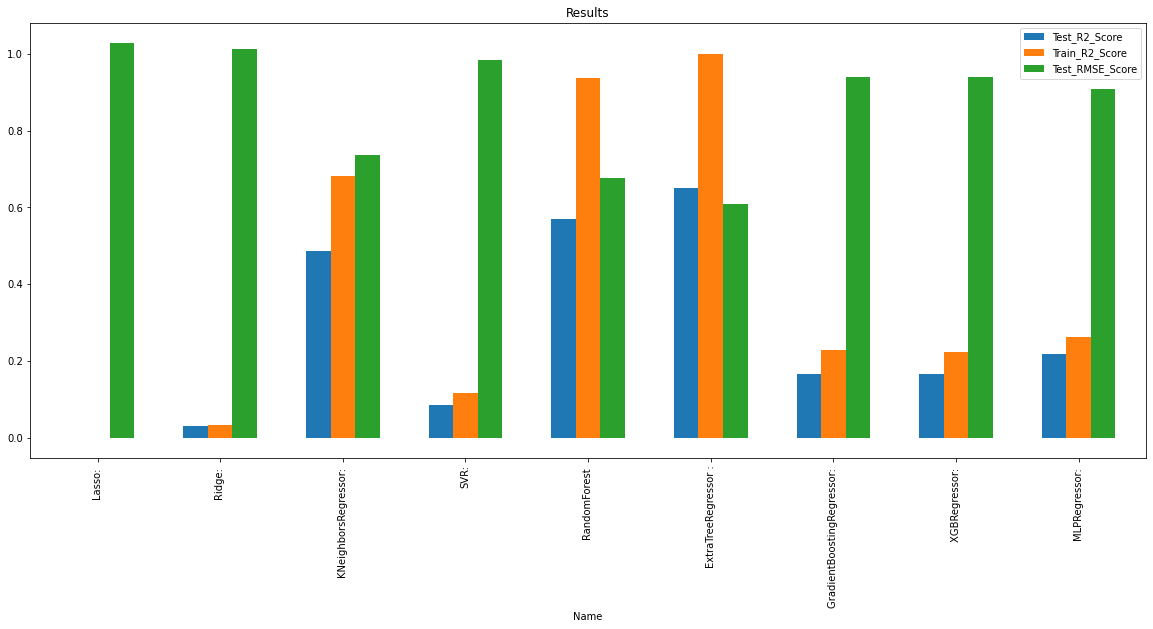

In [101]:
results_df.plot.bar(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], title = 'Results' , width = .6, figsize= (20,8))

# **Hyper-parameter Tuning**